<a href="https://colab.research.google.com/github/vinayR-cmd/UIADI_hack_colab/blob/main/UIADI_1_BIOMETRIC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df1=pd.read_csv("/content/api_data_aadhar_biometric_0_500000.csv")
df1.shape

(500000, 6)

In [4]:
df2=pd.read_csv("//content/api_data_aadhar_biometric_500000_1000000.csv")
df2.shape

(500000, 6)

In [5]:
df3=pd.read_csv("/content/api_data_aadhar_biometric_1000000_1500000.csv")
df3.shape

(500000, 6)

In [6]:
df4=pd.read_csv("/content/api_data_aadhar_biometric_1500000_1861108.csv")
df4.shape

(361108, 6)

In [7]:
df1.head()

date              state      district  pincode  bio_age_5_17  \
0  01-03-2025            Haryana  Mahendragarh   123029           280   
1  01-03-2025              Bihar     Madhepura   852121           144   
2  01-03-2025  Jammu and Kashmir         Punch   185101           643   
3  01-03-2025              Bihar       Bhojpur   802158           256   
4  01-03-2025         Tamil Nadu       Madurai   625514           271   

   bio_age_17_  
0          577  
1          369  
2         1091  
3          980  
4          815

In [8]:
df1['date'] = pd.to_datetime(df1['date'], format='mixed', dayfirst=True)
df2['date']=pd.to_datetime(df2['date'])
df3['date'] = pd.to_datetime(df3['date'], format='mixed', dayfirst=True)
df4['date'] = pd.to_datetime(df4['date'], format='mixed', dayfirst=True)


/tmp/ipython-input-4150860438.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df2['date']=pd.to_datetime(df2['date'])


In [9]:
df1.isnull().sum()

date            0
state           0
district        0
pincode         0
bio_age_5_17    0
bio_age_17_     0
dtype: int64

In [10]:
len(df1['state'].unique()), len(df2['state'].unique()), len(df3['state'].unique()), len(df4['state'].unique())

(56, 53, 55, 53)

In [11]:
df = pd.concat([df1, df2, df3, df4], axis=0, ignore_index=True)
df.shape


(1861108, 6)

In [12]:
df.head(3)

date              state      district  pincode  bio_age_5_17  \
0 2025-03-01            Haryana  Mahendragarh   123029           280   
1 2025-03-01              Bihar     Madhepura   852121           144   
2 2025-03-01  Jammu and Kashmir         Punch   185101           643   

   bio_age_17_  
0          577  
1          369  
2         1091

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1861108 entries, 0 to 1861107
Data columns (total 6 columns):
 #   Column        Dtype         
---  ------        -----         
 0   date          datetime64[ns]
 1   state         object        
 2   district      object        
 3   pincode       int64         
 4   bio_age_5_17  int64         
 5   bio_age_17_   int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 85.2+ MB


In [14]:
# df['year']=df['date'].dt.year
df['month_name']=df['date'].dt.month_name()
df['day_name']=df['date'].dt.day_name()

In [15]:
df.columns

Index(['date', 'state', 'district', 'pincode', 'bio_age_5_17', 'bio_age_17_',
       'month_name', 'day_name'],
      dtype='object')

In [16]:
df['total_bio_updates']=df['bio_age_5_17']+df['bio_age_17_']
df.head()


date              state      district  pincode  bio_age_5_17  \
0 2025-03-01            Haryana  Mahendragarh   123029           280   
1 2025-03-01              Bihar     Madhepura   852121           144   
2 2025-03-01  Jammu and Kashmir         Punch   185101           643   
3 2025-03-01              Bihar       Bhojpur   802158           256   
4 2025-03-01         Tamil Nadu       Madurai   625514           271   

   bio_age_17_ month_name  day_name  total_bio_updates  
0          577      March  Saturday                857  
1          369      March  Saturday                513  
2         1091      March  Saturday               1734  
3          980      March  Saturday               1236  
4          815      March  Saturday               1086

In [17]:
import pandas as pd
import re

def clean_state_name(x):
    if pd.isna(x):
        return x
    x = str(x).lower()
    x = re.sub(r'[^a-z\s]', ' ', x)   # remove symbols like &, .
    x = re.sub(r'\s+', ' ', x).strip()  # remove extra spaces
    return x


In [18]:
state_mapping = {
    # West Bengal
    'west bengal': 'West Bengal',
    'west bangal': 'West Bengal',
    'westbengal': 'West Bengal',
    'west  bengal': 'West Bengal',
    'westbengal ': 'West Bengal',

    # Andhra Pradesh
    'andhra pradesh': 'Andhra Pradesh',

    # Odisha
    'odisha': 'Odisha',
    'orissa': 'Odisha',

    # Jammu & Kashmir
    'jammu and kashmir': 'Jammu and Kashmir',
    'jammu kashmir': 'Jammu and Kashmir',

    # Collapse all Dadra / Daman variants into ONE state
    'dadra nagar haveli': 'Dadra and Nagar Haveli and Daman and Diu',
    'dadra and nagar haveli': 'Dadra and Nagar Haveli and Daman and Diu',
    'daman and diu': 'Dadra and Nagar Haveli and Daman and Diu',
    'dadra and nagar haveli and daman and diu': 'Dadra and Nagar Haveli and Daman and Diu',
    'the dadra and nagar haveli and daman and diu': 'Dadra and Nagar Haveli and Daman and Diu',
    'daman diu': 'Dadra and Nagar Haveli and Daman and Diu',


    # Puducherry
    'puducherry': 'Puducherry',


    # Andaman & Nicobar Islands
    'andaman and nicobar islands': 'Andaman and Nicobar Islands',
    'andaman nicobar islands': 'Andaman and Nicobar Islands',

    # Puducherry
    'pondicherry': 'Puducherry',

    # Case-normalized direct matches
    'delhi': 'Delhi',
    'ladakh': 'Ladakh',
    'goa': 'Goa',
    'sikkim': 'Sikkim',
    'assam': 'Assam',
    'bihar': 'Bihar',
    'punjab': 'Punjab',
    'kerala': 'Kerala',
    'haryana': 'Haryana',
    'gujarat': 'Gujarat',
    'tamil nadu': 'Tamil Nadu',
    'telangana': 'Telangana',
    'karnataka': 'Karnataka',
    'maharashtra': 'Maharashtra',
    'rajasthan': 'Rajasthan',
    'uttar pradesh': 'Uttar Pradesh',
    'madhya pradesh': 'Madhya Pradesh',
    'himachal pradesh': 'Himachal Pradesh',
    'arunachal pradesh': 'Arunachal Pradesh',
    'chhattisgarh': 'Chhattisgarh',
    'jharkhand': 'Jharkhand',
    'manipur': 'Manipur',
    'meghalaya': 'Meghalaya',
    'mizoram': 'Mizoram',
    'nagaland': 'Nagaland',
    'tripura': 'Tripura',
    'uttarakhand': 'Uttarakhand',
    'lakshadweep': 'Lakshadweep',
    'chandigarh': 'Chandigarh'
}


In [19]:
df['state'] = (
    df['state']
    .apply(clean_state_name)
    .map(state_mapping)
)


In [20]:
df['state'].unique(), df['state'].nunique()

(array(['Haryana', 'Bihar', 'Jammu and Kashmir', 'Tamil Nadu',
        'Maharashtra', 'Gujarat', 'Odisha', 'West Bengal', 'Kerala',
        'Rajasthan', 'Punjab', 'Himachal Pradesh', 'Uttar Pradesh',
        'Assam', 'Uttarakhand', 'Madhya Pradesh', 'Karnataka',
        'Andhra Pradesh', 'Telangana', 'Goa', 'Nagaland', 'Jharkhand',
        'Delhi', 'Chhattisgarh', 'Meghalaya', 'Chandigarh', 'Puducherry',
        'Manipur', 'Sikkim', 'Tripura', 'Mizoram', 'Arunachal Pradesh',
        'Ladakh', 'Dadra and Nagar Haveli and Daman and Diu',
        'Andaman and Nicobar Islands', 'Lakshadweep', nan], dtype=object),
 36)

In [21]:
df.isnull().sum()

date                 0
state                8
district             0
pincode              0
bio_age_5_17         0
bio_age_17_          0
month_name           0
day_name             0
total_bio_updates    0
dtype: int64

In [22]:
df_check=df[df['state']=='Uttar Pradesh']
df_check.head()

date          state        district  pincode  bio_age_5_17  \
21  2025-03-01  Uttar Pradesh      Bara Banki   225408            17   
69  2025-03-01  Uttar Pradesh          Hardoi   241406           803   
70  2025-03-01  Uttar Pradesh  Siddharthnagar   272205           857   
75  2025-03-01  Uttar Pradesh          Hardoi   241304          1025   
138 2025-03-01  Uttar Pradesh          Ballia   277209           293   

     bio_age_17_ month_name  day_name  total_bio_updates  
21             3      March  Saturday                 20  
69           216      March  Saturday               1019  
70           272      March  Saturday               1129  
75           328      March  Saturday               1353  
138          185      March  Saturday                478

In [23]:
df_check['district'].unique()

array(['Bara Banki', 'Hardoi', 'Siddharthnagar', 'Ballia', 'Lucknow',
       'Bahraich', 'Basti', 'Allahabad', 'Unnao', 'Budaun',
       'Kanpur Dehat', 'Aligarh', 'Meerut', 'Kushinagar', 'Gorakhpur',
       'Faizabad', 'Varanasi', 'Chandauli', 'Kanpur Nagar', 'Sonbhadra',
       'Rampur', 'Kannauj', 'Azamgarh', 'Ambedkar Nagar', 'Moradabad',
       'Chitrakoot', 'Auraiya', 'Banda', 'Sant Ravidas Nagar', 'Mathura',
       'Agra', 'Muzaffarnagar', 'Bulandshahr', 'Pilibhit', 'Kheri',
       'Jalaun', 'Sant Kabir Nagar', 'Jaunpur', 'Mainpuri', 'Deoria',
       'Ayodhya', 'Kaushambi', 'Etawah', 'Jhansi', 'Fatehpur', 'Shamli',
       'Ghaziabad', 'Saharanpur', 'Rae Bareli', 'Bareilly', 'Balrampur',
       'Shahjahanpur', 'Hamirpur', 'Hathras', 'Pratapgarh', 'Gonda',
       'Mau', 'Baghpat', 'Sitapur', 'Ghazipur', 'Bijnor', 'Mirzapur',
       'Amroha', 'Sambhal', 'Amethi', 'Hapur', 'Prayagraj', 'Farrukhabad',
       'Bhadohi', 'Firozabad', 'Gautam Buddha Nagar', 'Kasganj',
       'Sultanpur'

In [24]:
df_check.groupby('district')['pincode'].nunique()

district
Agra              36
Aligarh           38
Allahabad         54
Ambedkar Nagar    43
Amethi            55
                  ..
Sitapur           25
Sonbhadra         24
Sultanpur         42
Unnao             33
Varanasi          53
Name: pincode, Length: 90, dtype: int64

In [25]:
key_cols = ['date', 'state', 'district', 'pincode']

df[df.duplicated(subset=key_cols, keep=False)] \
  .sort_values(key_cols)


date                                     state  \
12711   2025-03-01  Dadra and Nagar Haveli and Daman and Diu   
21641   2025-03-01  Dadra and Nagar Haveli and Daman and Diu   
12770   2025-03-01  Dadra and Nagar Haveli and Daman and Diu   
18587   2025-03-01  Dadra and Nagar Haveli and Daman and Diu   
2277    2025-03-01  Dadra and Nagar Haveli and Daman and Diu   
...            ...                                       ...   
1854688 2025-12-29                                Puducherry   
1845116 2025-12-29                                Puducherry   
1859288 2025-12-29                                Puducherry   
1851565 2025-12-29                               West Bengal   
1851649 2025-12-29                               West Bengal   

                       district  pincode  bio_age_5_17  bio_age_17_  \
12711    Dadra and Nagar Haveli   396230            88          261   
21641    Dadra and Nagar Haveli   396230           732         1793   
12770    Dadra and Nagar Haveli   396235            59          164   
18587    Dadra and Nagar Haveli   396235            11           26   
2277                      Daman   396210            20           53   
...                         ...      ...           ...          ...   
1854688             Pondicherry   605007             0            1   
1845116             Pondicherry   605009             4            3   
1859288             Pondicherry   605009             0            1   
1851565                 Hooghly   712135             1            0   
1851649                 Hooghly   712135             1            2   

        month_name  day_name  total_bio_updates  
12711        March  Saturday                349  
21641        March  Saturday               2525  
12770        March  Saturday                223  
18587        March  Saturday                 37  
2277         March  Saturday                 73  
...            ...       ...                ...  
1854688   December    Monday                  1  
1845116   December    Monday                  7  
1859288   December    Monday                  1  
1851565   December    Monday                  1  
1851649   December    Monday                  3  

[213042 rows x 9 columns]

In [26]:
!pip install ydata-profiling

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.4/400.4 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 25.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 66.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 48.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 3.7 MB/s eta 0:00:00


In [28]:
from ydata_profiling import ProfileReport
profile=ProfileReport(df, title='Pandas Profiling Report', explorative=True)
profile.to_file("eda.html")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 9/9 [00:34<00:00,  3.81s/it]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [29]:
# Remove rows where total_enrollments is 0 (rare but safe)
df = df[df['total_bio_updates'] > 0].copy()


In [30]:
df.shape

(1861096, 9)

In [31]:
df.columns

Index(['date', 'state', 'district', 'pincode', 'bio_age_5_17', 'bio_age_17_',
       'month_name', 'day_name', 'total_bio_updates'],
      dtype='object')

In [33]:
df['child_bio_ratio'] = df['bio_age_5_17'] / df['total_bio_updates']
df['adult_bio_ratio'] = df['bio_age_17_'] / df['total_bio_updates']
# df['adult_enrolment_ratio'] = df['age_18_greater'] / df['total_enrollments']


In [34]:
df.head()

date              state      district  pincode  bio_age_5_17  \
0 2025-03-01            Haryana  Mahendragarh   123029           280   
1 2025-03-01              Bihar     Madhepura   852121           144   
2 2025-03-01  Jammu and Kashmir         Punch   185101           643   
3 2025-03-01              Bihar       Bhojpur   802158           256   
4 2025-03-01         Tamil Nadu       Madurai   625514           271   

   bio_age_17_ month_name  day_name  total_bio_updates  child_bio_ratio  \
0          577      March  Saturday                857         0.326721   
1          369      March  Saturday                513         0.280702   
2         1091      March  Saturday               1734         0.370819   
3          980      March  Saturday               1236         0.207120   
4          815      March  Saturday               1086         0.249540   

   adult_bio_ratio  
0         0.673279  
1         0.719298  
2         0.629181  
3         0.792880  
4         0.750460

In [35]:
df.columns

Index(['date', 'state', 'district', 'pincode', 'bio_age_5_17', 'bio_age_17_',
       'month_name', 'day_name', 'total_bio_updates', 'child_bio_ratio',
       'adult_bio_ratio'],
      dtype='object')

In [36]:
# Create month column (safe even if month_name exists)
df['month'] = df['date'].dt.to_period('M')

In [37]:
df.head()

date              state      district  pincode  bio_age_5_17  \
0 2025-03-01            Haryana  Mahendragarh   123029           280   
1 2025-03-01              Bihar     Madhepura   852121           144   
2 2025-03-01  Jammu and Kashmir         Punch   185101           643   
3 2025-03-01              Bihar       Bhojpur   802158           256   
4 2025-03-01         Tamil Nadu       Madurai   625514           271   

   bio_age_17_ month_name  day_name  total_bio_updates  child_bio_ratio  \
0          577      March  Saturday                857         0.326721   
1          369      March  Saturday                513         0.280702   
2         1091      March  Saturday               1734         0.370819   
3          980      March  Saturday               1236         0.207120   
4          815      March  Saturday               1086         0.249540   

   adult_bio_ratio    month  
0         0.673279  2025-03  
1         0.719298  2025-03  
2         0.629181  2025-03  
3         0.792880  2025-03  
4         0.750460  2025-03

In [38]:
monthly_df_bio = (
    df.groupby(['state', 'district', 'month'], as_index=False)
    .agg({
        'bio_age_5_17': 'sum',
        'bio_age_17_': 'sum',
        'total_bio_updates': 'sum'
    })
)

monthly_df_bio.head()


state  district    month  bio_age_5_17  bio_age_17_  \
0  Andaman and Nicobar Islands  Andamans  2025-03            16          193   
1  Andaman and Nicobar Islands  Andamans  2025-04            17          167   
2  Andaman and Nicobar Islands  Andamans  2025-05            22          158   
3  Andaman and Nicobar Islands  Andamans  2025-06            11          129   
4  Andaman and Nicobar Islands  Andamans  2025-07            20          239   

   total_bio_updates  
0                209  
1                184  
2                180  
3                140  
4                259

In [39]:
monthly_df_bio.shape

(8166, 6)

In [40]:
monthly_df_bio['child_bio_ratio'] = (
    monthly_df_bio['bio_age_5_17'] / monthly_df_bio['total_bio_updates']
)

monthly_df_bio['adult_bio_ratio'] = (
    monthly_df_bio['bio_age_17_'] / monthly_df_bio['total_bio_updates']
)


In [41]:
monthly_df_bio['bio_risk_score'] = (
    0.7 * monthly_df_bio['child_bio_ratio'] +
    0.3 * monthly_df_bio['adult_bio_ratio']
)


In [42]:
monthly_df_bio.head()

state  district    month  bio_age_5_17  bio_age_17_  \
0  Andaman and Nicobar Islands  Andamans  2025-03            16          193   
1  Andaman and Nicobar Islands  Andamans  2025-04            17          167   
2  Andaman and Nicobar Islands  Andamans  2025-05            22          158   
3  Andaman and Nicobar Islands  Andamans  2025-06            11          129   
4  Andaman and Nicobar Islands  Andamans  2025-07            20          239   

   total_bio_updates  child_bio_ratio  adult_bio_ratio  bio_risk_score  
0                209         0.076555         0.923445        0.330622  
1                184         0.092391         0.907609        0.336957  
2                180         0.122222         0.877778        0.348889  
3                140         0.078571         0.921429        0.331429  
4                259         0.077220         0.922780        0.330888

In [43]:
df.head()

date              state      district  pincode  bio_age_5_17  \
0 2025-03-01            Haryana  Mahendragarh   123029           280   
1 2025-03-01              Bihar     Madhepura   852121           144   
2 2025-03-01  Jammu and Kashmir         Punch   185101           643   
3 2025-03-01              Bihar       Bhojpur   802158           256   
4 2025-03-01         Tamil Nadu       Madurai   625514           271   

   bio_age_17_ month_name  day_name  total_bio_updates  child_bio_ratio  \
0          577      March  Saturday                857         0.326721   
1          369      March  Saturday                513         0.280702   
2         1091      March  Saturday               1734         0.370819   
3          980      March  Saturday               1236         0.207120   
4          815      March  Saturday               1086         0.249540   

   adult_bio_ratio    month  
0         0.673279  2025-03  
1         0.719298  2025-03  
2         0.629181  2025-03  
3         0.792880  2025-03  
4         0.750460  2025-03

In [44]:
df.columns

Index(['date', 'state', 'district', 'pincode', 'bio_age_5_17', 'bio_age_17_',
       'month_name', 'day_name', 'total_bio_updates', 'child_bio_ratio',
       'adult_bio_ratio', 'month'],
      dtype='object')

In [45]:
df[df.duplicated(subset=['date', 'state', 'district', 'pincode','total_bio_updates'])]


date           state    district  pincode  bio_age_5_17  \
110000  2025-09-01    Chhattisgarh   Kondagaon   494229             0   
110001  2025-09-01    Chhattisgarh   Kondagaon   494230             1   
110002  2025-09-01    Chhattisgarh       Korba   495119             5   
110003  2025-09-01    Chhattisgarh       Korba   495446             0   
110004  2025-09-01    Chhattisgarh       Korba   495674            10   
...            ...             ...         ...      ...           ...   
1860707 2025-12-29  Andhra Pradesh    Prakasam   523327             3   
1860708 2025-12-29  Andhra Pradesh    Prakasam   523368             2   
1860709 2025-12-29  Andhra Pradesh    Prakasam   523370             1   
1860710 2025-12-29  Andhra Pradesh    Prakasam   523371             2   
1860711 2025-12-29  Andhra Pradesh  Rangareddi   500005             2   

         bio_age_17_ month_name day_name  total_bio_updates  child_bio_ratio  \
110000             1  September   Monday                  1         0.000000   
110001             0  September   Monday                  1         1.000000   
110002            35  September   Monday                 40         0.125000   
110003            16  September   Monday                 16         0.000000   
110004            34  September   Monday                 44         0.227273   
...              ...        ...      ...                ...              ...   
1860707            7   December   Monday                 10         0.300000   
1860708            3   December   Monday                  5         0.400000   
1860709            1   December   Monday                  2         0.500000   
1860710            1   December   Monday                  3         0.666667   
1860711            1   December   Monday                  3         0.666667   

         adult_bio_ratio    month  
110000          1.000000  2025-09  
110001          0.000000  2025-09  
110002          0.875000  2025-09  
110003          1.000000  2025-09  
110004          0.772727  2025-09  
...                  ...      ...  
1860707         0.700000  2025-12  
1860708         0.600000  2025-12  
1860709         0.500000  2025-12  
1860710         0.333333  2025-12  
1860711         0.333333  2025-12  

[95902 rows x 12 columns]

In [46]:
key_cols = ['date', 'state', 'district', 'pincode']

print("Duplicate rows:", df.duplicated(subset=key_cols).sum())

df[df.duplicated(subset=key_cols, keep=False)].sort_values(key_cols)


Duplicate rows: 107021


date                                     state  \
12711   2025-03-01  Dadra and Nagar Haveli and Daman and Diu   
21641   2025-03-01  Dadra and Nagar Haveli and Daman and Diu   
12770   2025-03-01  Dadra and Nagar Haveli and Daman and Diu   
18587   2025-03-01  Dadra and Nagar Haveli and Daman and Diu   
2277    2025-03-01  Dadra and Nagar Haveli and Daman and Diu   
...            ...                                       ...   
1854688 2025-12-29                                Puducherry   
1845116 2025-12-29                                Puducherry   
1859288 2025-12-29                                Puducherry   
1851565 2025-12-29                               West Bengal   
1851649 2025-12-29                               West Bengal   

                       district  pincode  bio_age_5_17  bio_age_17_  \
12711    Dadra and Nagar Haveli   396230            88          261   
21641    Dadra and Nagar Haveli   396230           732         1793   
12770    Dadra and Nagar Haveli   396235            59          164   
18587    Dadra and Nagar Haveli   396235            11           26   
2277                      Daman   396210            20           53   
...                         ...      ...           ...          ...   
1854688             Pondicherry   605007             0            1   
1845116             Pondicherry   605009             4            3   
1859288             Pondicherry   605009             0            1   
1851565                 Hooghly   712135             1            0   
1851649                 Hooghly   712135             1            2   

        month_name  day_name  total_bio_updates  child_bio_ratio  \
12711        March  Saturday                349         0.252149   
21641        March  Saturday               2525         0.289901   
12770        March  Saturday                223         0.264574   
18587        March  Saturday                 37         0.297297   
2277         March  Saturday                 73         0.273973   
...            ...       ...                ...              ...   
1854688   December    Monday                  1         0.000000   
1845116   December    Monday                  7         0.571429   
1859288   December    Monday                  1         0.000000   
1851565   December    Monday                  1         1.000000   
1851649   December    Monday                  3         0.333333   

         adult_bio_ratio    month  
12711           0.747851  2025-03  
21641           0.710099  2025-03  
12770           0.735426  2025-03  
18587           0.702703  2025-03  
2277            0.726027  2025-03  
...                  ...      ...  
1854688         1.000000  2025-12  
1845116         0.428571  2025-12  
1859288         1.000000  2025-12  
1851565         0.000000  2025-12  
1851649         0.666667  2025-12  

[213040 rows x 12 columns]

In [47]:
key_cols = ['state', 'district', 'month']

print("Duplicate rows:", monthly_df_bio.duplicated(subset=key_cols).sum())

monthly_df_bio[monthly_df_bio.duplicated(subset=key_cols, keep=False)].sort_values(key_cols)

Duplicate rows: 0


Empty DataFrame
Columns: [state, district, month, bio_age_5_17, bio_age_17_, total_bio_updates, child_bio_ratio, adult_bio_ratio, bio_risk_score]
Index: []

In [ ]:
df = df.drop_duplicates()
# ye code run nhi kiy ahai abhi jb run krenge tb df me se jo true duplicates hai sirf wo hi delte ho hongi, is code cell ko jb montly_df bnayenge tbhi use krenge for monthly aggregation


In [50]:
num_cols=df.select_dtypes(include=['number']).columns.tolist()
cat_cols=df.select_dtypes(include=['category','object']).columns.tolist()

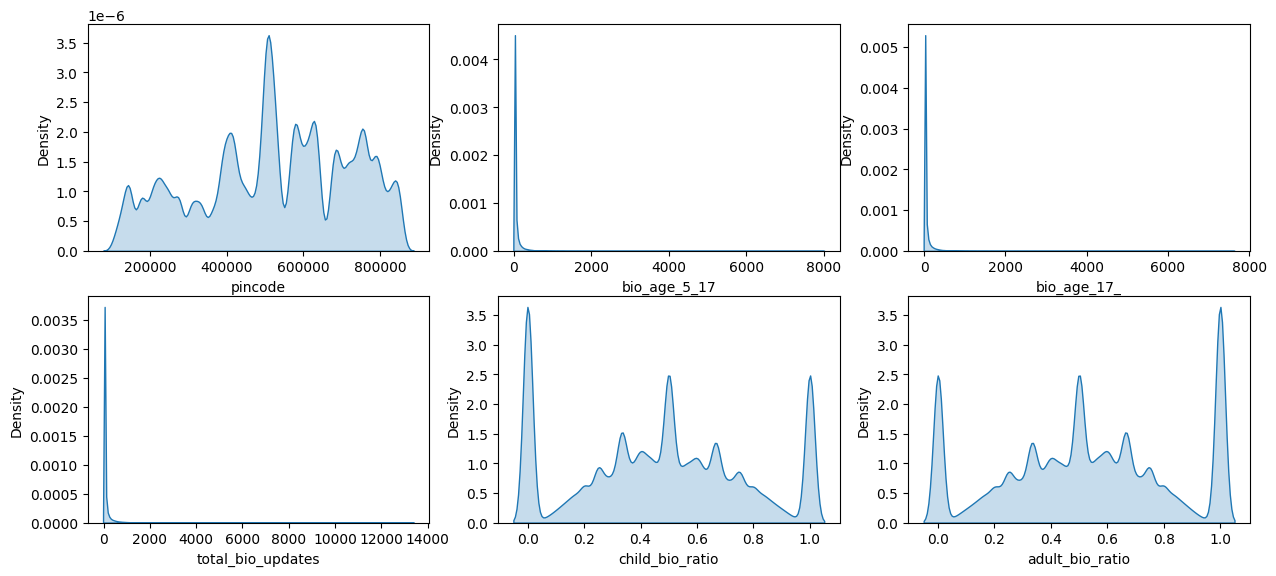

In [51]:
plt.figure(figsize=(15,10))

for i , col in enumerate(num_cols, 1):
  plt.subplot(3,3,i)
  sns.kdeplot(df[col], fill=True)
  plt.xlabel(col)

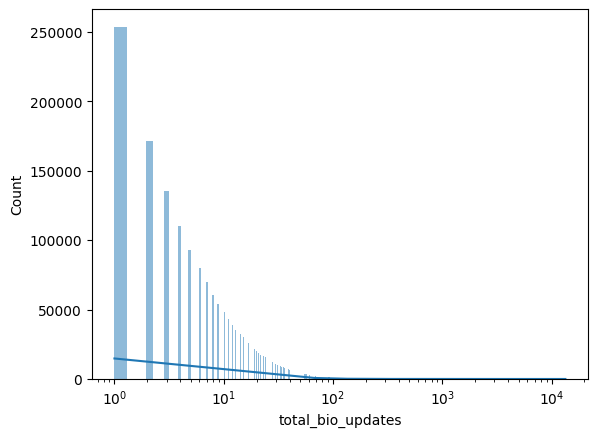

In [52]:
sns.histplot(data=df, x='total_bio_updates', kde=True)
plt.xscale('log')
plt.show()

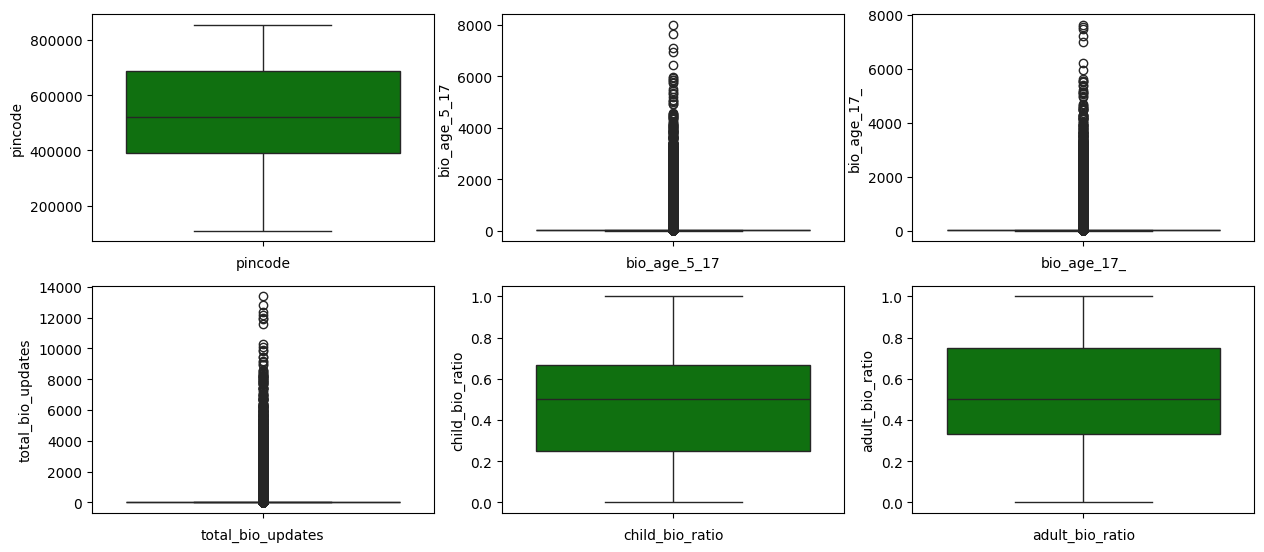

In [53]:
plt.figure(figsize=(15,10))

for i , col in enumerate(num_cols, 1):
  plt.subplot(3,3,i)
  sns.boxplot(y=col, data =df, color='green')
  plt.xlabel(col)

In [54]:
df[num_cols].describe()

pincode  bio_age_5_17   bio_age_17_  total_bio_updates  \
count  1.861096e+06  1.861096e+06  1.861096e+06       1.861096e+06   
mean   5.217612e+05  1.839070e+01  1.909425e+01       3.748495e+01   
std    1.981630e+05  8.370447e+01  8.806529e+01       1.623307e+02   
min    1.100010e+05  0.000000e+00  0.000000e+00       1.000000e+00   
25%    3.911750e+05  1.000000e+00  1.000000e+00       3.000000e+00   
50%    5.224010e+05  3.000000e+00  4.000000e+00       8.000000e+00   
75%    6.866370e+05  1.100000e+01  1.000000e+01       2.200000e+01   
max    8.554560e+05  8.002000e+03  7.625000e+03       1.338100e+04   

       child_bio_ratio  adult_bio_ratio  
count     1.861096e+06     1.861096e+06  
mean      4.728476e-01     5.271524e-01  
std       3.038662e-01     3.038662e-01  
min       0.000000e+00     0.000000e+00  
25%       2.500000e-01     3.333333e-01  
50%       5.000000e-01     5.000000e-01  
75%       6.666667e-01     7.500000e-01  
max       1.000000e+00     1.000000e+00

In [55]:
num_cols, cat_cols

(['pincode',
  'bio_age_5_17',
  'bio_age_17_',
  'total_bio_updates',
  'child_bio_ratio',
  'adult_bio_ratio'],
 ['state', 'district', 'month_name', 'day_name'])

In [56]:
state_wise_updates=df.groupby('state')['total_bio_updates'].count().reset_index()
state_wise_updates.head()

state  total_bio_updates
0  Andaman and Nicobar Islands               1847
1               Andhra Pradesh             172063
2            Arunachal Pradesh               4244
3                        Assam              47642
4                        Bihar              83398

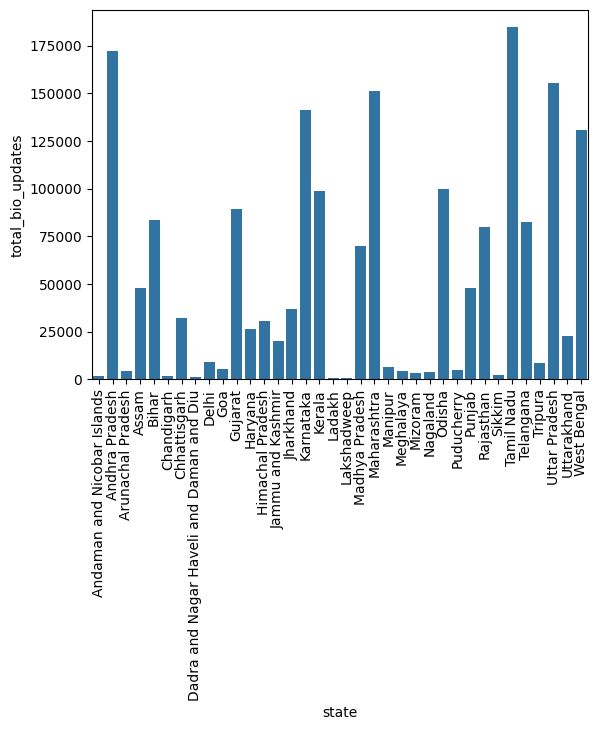

In [57]:
sns.barplot(x='state',y='total_bio_updates', data=state_wise_updates)
plt.xticks(rotation=90)
plt.show()

In [58]:
month_wise_updates=df.groupby('month_name')['total_bio_updates'].count().reset_index()

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'April'),
  Text(1, 0, 'December'),
  Text(2, 0, 'July'),
  Text(3, 0, 'June'),
  Text(4, 0, 'March'),
  Text(5, 0, 'May'),
  Text(6, 0, 'November'),
  Text(7, 0, 'October'),
  Text(8, 0, 'September')])

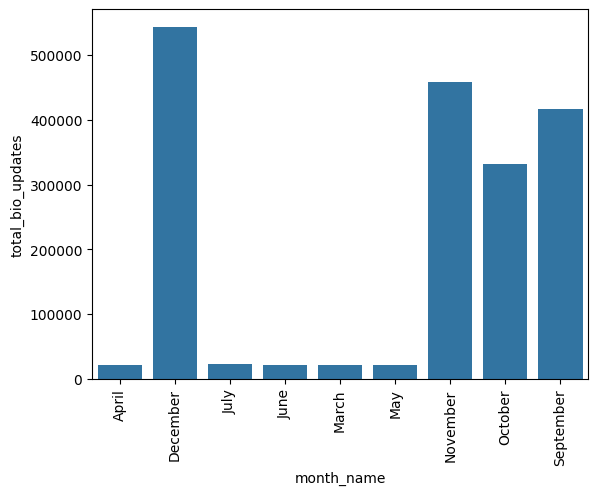

In [59]:
sns.barplot(x='month_name', y='total_bio_updates', data=month_wise_updates)
plt.xticks(rotation=90)

In [60]:
state_and_momth_wise=df.groupby(['month_name','state'])['total_bio_updates'].sum().reset_index()

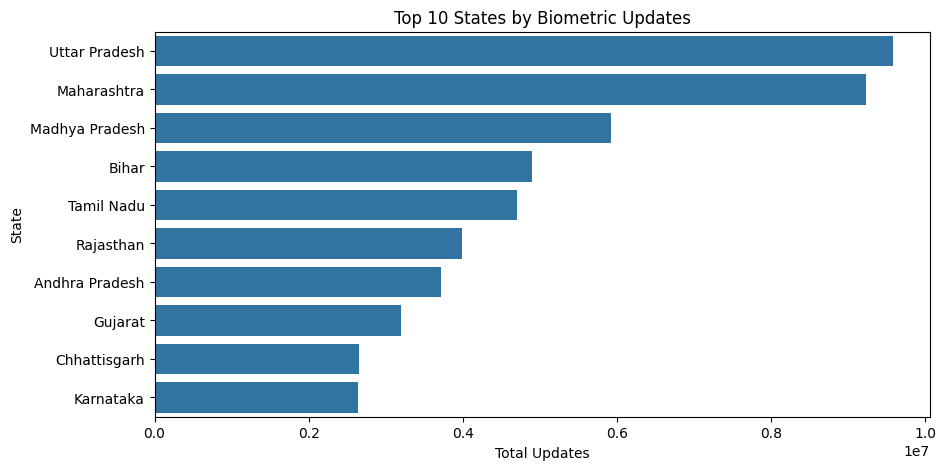

In [61]:
state_total = (
    df.groupby('state')['total_bio_updates']
      .sum()
      .sort_values(ascending=False)
      .head(10)
      .reset_index()
)

plt.figure(figsize=(10,5))
sns.barplot(
    data=state_total,
    x='total_bio_updates',
    y='state'
)
plt.title('Top 10 States by Biometric Updates')
plt.xlabel('Total Updates')
plt.ylabel('State')
plt.show()


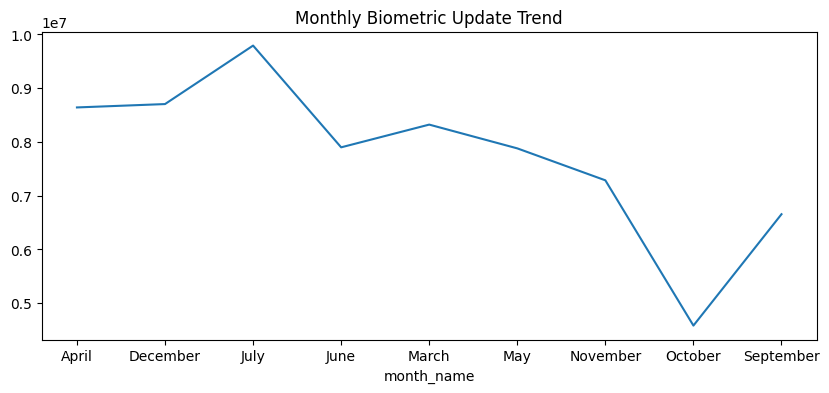

In [62]:
monthly_updates = (
    df.groupby('month_name')['total_bio_updates']
      .sum()
)

monthly_updates.plot(
    title='Monthly Biometric Update Trend',
    figsize=(10,4)
)
plt.show()


In [63]:
summary = df.pivot_table(
    values='total_bio_updates',
    index='state',
    columns='month_name',
    aggfunc='count'
)
summary


month_name                                April  December  July  June  March  \
state                                                                          
Andaman and Nicobar Islands                  22       520    19    18     22   
Andhra Pradesh                             1843     49851  1848  2072   1865   
Arunachal Pradesh                            53      1111    51    49     53   
Assam                                       531     14072   569   524    580   
Bihar                                      1011     24046  1002   993   1006   
Chandigarh                                   21       483    21    20     20   
Chhattisgarh                                330      9890   358   359    313   
Dadra and Nagar Haveli and Daman and Diu     15       405    14    14     17   
Delhi                                       108      2657   104   105    105   
Goa                                          70      1518    63    60     71   
Gujarat                                    1113     27756  1145  1133   1123   
Haryana                                     319      7708   317   313    316   
Himachal Pradesh                            386      8756   377   347    386   
Jammu and Kashmir                           223      5893   227   216    230   
Jharkhand                                   458     10657   434   433    447   
Karnataka                                  1683     42796  1746  1751   1724   
Kerala                                     1293     30839  1297  1329   1264   
Ladakh                                       11       240     8     6     10   
Lakshadweep                                   8       164     7     6      6   
Madhya Pradesh                              830     21431   848   842    817   
Maharashtra                                1651     44278  1699  1699   1648   
Manipur                                      78      1758    84    68     72   
Meghalaya                                    57      1072    57    52     55   
Mizoram                                      61       811    47    50     68   
Nagaland                                     44      1071    42    40     44   
Odisha                                     1115     28583  1120  1067   1108   
Puducherry                                   45      1406    47    47     42   
Punjab                                      577     13955   600   578    577   
Rajasthan                                   984     23365  1001   991    994   
Sikkim                                       39       616    34    33     42   
Tamil Nadu                                 2152     55706  2208  2234   2360   
Telangana                                   914     22637   993   977    958   
Tripura                                     111      2330   107   104    111   
Uttar Pradesh                              1824     42504  1851  1789   1823   
Uttarakhand                                 265      6832   261   250    256   
West Bengal                                1358     36037  1563  1422   1420   

month_name                                 May  November  October  September  
state                                                                         
Andaman and Nicobar Islands                 21       425      358        442  
Andhra Pradesh                            2042     42411    32727      37404  
Arunachal Pradesh                           53      1101      762       1011  
Assam                                      543     11446     8741      10636  
Bihar                                      992     20238    15056      19054  
Chandigarh                                  21       400      282        388  
Chhattisgarh                               333      7750     5558       7101  
Dadra and Nagar Haveli and Daman and Diu    16       325      195        324  
Delhi                                      106      2180     1712       2182  
Goa                                         71      1406     1006       1163  
Gujarat    

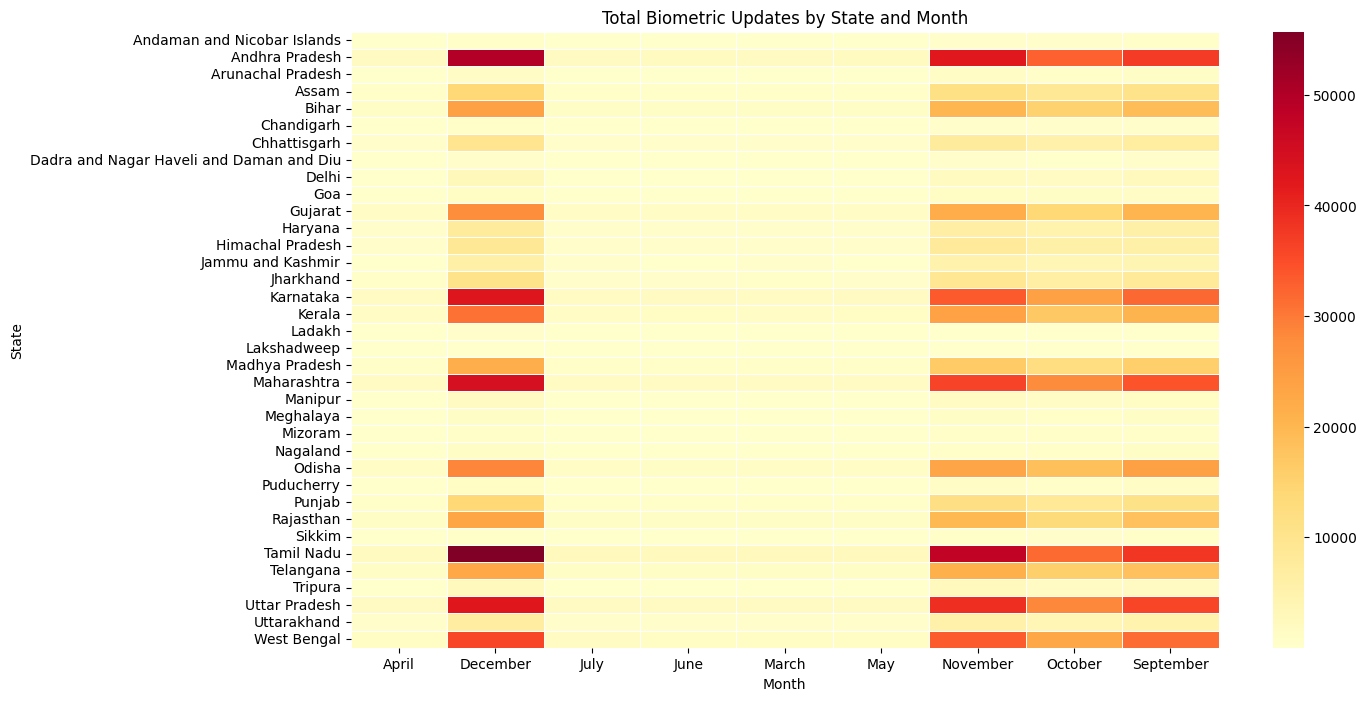

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14,8))
sns.heatmap(
    summary,
    cmap='YlOrRd',
    linewidths=0.5
)

plt.title('Total Biometric Updates by State and Month')
plt.xlabel('Month')
plt.ylabel('State')
plt.show()


In [65]:
num_cols, cat_cols

(['pincode',
  'bio_age_5_17',
  'bio_age_17_',
  'total_bio_updates',
  'child_bio_ratio',
  'adult_bio_ratio'],
 ['state', 'district', 'month_name', 'day_name'])

<Axes: xlabel='total_bio_updates', ylabel='bio_age_5_17'>

/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


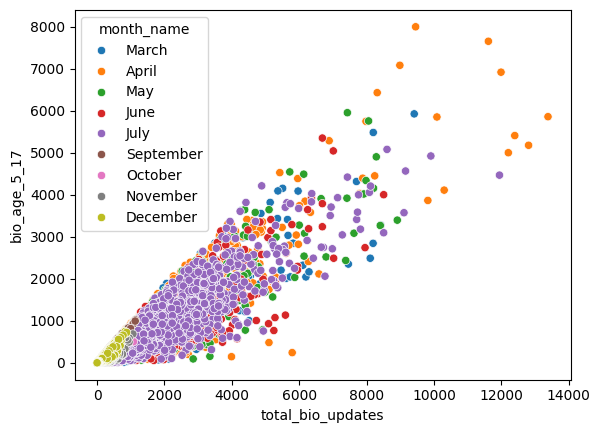

In [66]:
sns.scatterplot(x='total_bio_updates', y='bio_age_5_17', data=df, hue='month_name')

<Axes: xlabel='total_bio_updates', ylabel='bio_age_17_'>

/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


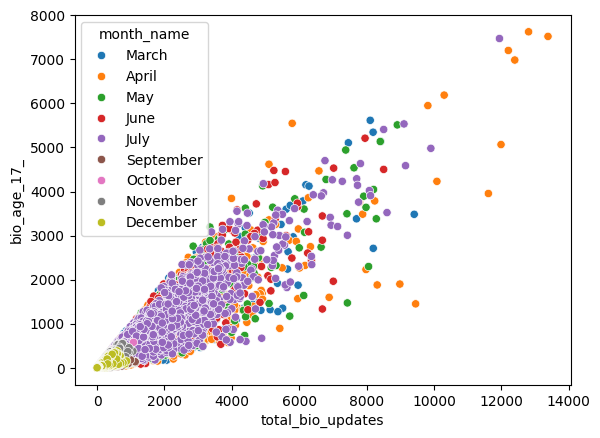

In [67]:
sns.scatterplot(x='total_bio_updates', y='bio_age_17_', data=df, hue='month_name')
# yha se pta chl rha ki age_5_17 and age_0_5 ye dono total_enrollments ke sat linearly relationship me hia

/tmp/ipython-input-2987609269.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


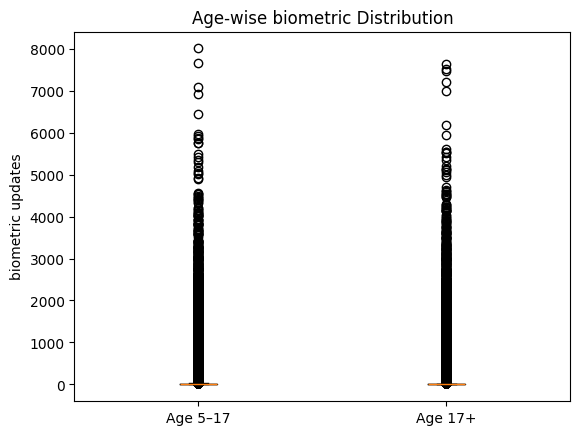

In [68]:
# Boxplots for age groups

plt.figure()
plt.boxplot(
    [df['bio_age_5_17'], df['bio_age_17_']],
    labels=['Age 5–17', 'Age 17+']
)
plt.title("Age-wise biometric Distribution")
plt.ylabel("biometric updates")
plt.show()


In [69]:
df['district'].unique()

array(['Mahendragarh', 'Madhepura', 'Punch', 'Bhojpur', 'Madurai',
       'Ratnagiri', 'Anand', 'Gandhinagar', 'Dhenkanal', 'Valsad',
       'Salem', 'Hooghly', 'Paschim Medinipur', 'Wayanad',
       'Sawai Madhopur', 'Vaishali', 'Karur', 'Rupnagar', 'Sabarkantha',
       'Una', 'Bhilwara', 'Bara Banki', 'Cachar', 'Dehradun', 'Chamba',
       'Shajapur', 'The Nilgiris', 'Wardha', 'Nabarangapur',
       'Shaheed Bhagat Singh Nagar', 'Davangere', 'Dahod', 'Tiruppur',
       'Vizianagaram', 'Moga', 'Rajkot', 'Hyderabad', 'Sundergarh',
       'Kurnool', 'Warangal', 'Tirunelveli', 'South Goa', 'Anantapur',
       'Thiruvananthapuram', 'Srikakulam', 'Nizamabad', 'Cuttack',
       'Baran', 'Guntur', 'Mysuru', 'Purba Medinipur', 'Ernakulam',
       'Balaghat', 'Sivaganga', 'Harda *', 'Mokokchung', 'Uttara Kannada',
       'Perambalur', 'Udupi', 'Ananthapur', 'Coimbatore',
       'West Singhbhum', 'Tumakuru', 'Birbhum', 'Visakhapatnam', 'Hardoi',
       'Siddharthnagar', 'Dhanbad', 'Darbhanga',

In [70]:
district_count=df.groupby('district')['total_bio_updates'].count().reset_index()
district_count

district  total_bio_updates
0             ?                  1
1         ANGUL                  4
2        ANUGUL                 45
3      Adilabad               6934
4    Agar Malwa                482
..          ...                ...
969      jajpur                 81
970       nadia                  7
971  rangareddi                  8
972    udhampur                  1
973      yadgir                813

[974 rows x 2 columns]

In [71]:
df['date'].unique()

<DatetimeArray>
['2025-03-01 00:00:00', '2025-04-01 00:00:00', '2025-05-01 00:00:00',
 '2025-06-01 00:00:00', '2025-07-01 00:00:00', '2025-09-01 00:00:00',
 '2025-09-02 00:00:00', '2025-09-03 00:00:00', '2025-09-04 00:00:00',
 '2025-09-05 00:00:00', '2025-09-06 00:00:00', '2025-09-07 00:00:00',
 '2025-09-08 00:00:00', '2025-09-09 00:00:00', '2025-09-10 00:00:00',
 '2025-09-11 00:00:00', '2025-09-12 00:00:00', '2025-09-13 00:00:00',
 '2025-09-14 00:00:00', '2025-09-15 00:00:00', '2025-09-16 00:00:00',
 '2025-09-17 00:00:00', '2025-09-18 00:00:00', '2025-09-19 00:00:00',
 '2025-09-20 00:00:00', '2025-10-13 00:00:00', '2025-10-15 00:00:00',
 '2025-10-16 00:00:00', '2025-10-17 00:00:00', '2025-10-18 00:00:00',
 '2025-10-19 00:00:00', '2025-10-20 00:00:00', '2025-10-21 00:00:00',
 '2025-10-22 00:00:00', '2025-10-23 00:00:00', '2025-10-24 00:00:00',
 '2025-10-25 00:00:00', '2025-10-26 00:00:00', '2025-10-27 00:00:00',
 '2025-10-28 00:00:00', '2025-10-29 00:00:00', '2025-10-30 00:00:00',
 '20

In [72]:
df.head()

date              state      district  pincode  bio_age_5_17  \
0 2025-03-01            Haryana  Mahendragarh   123029           280   
1 2025-03-01              Bihar     Madhepura   852121           144   
2 2025-03-01  Jammu and Kashmir         Punch   185101           643   
3 2025-03-01              Bihar       Bhojpur   802158           256   
4 2025-03-01         Tamil Nadu       Madurai   625514           271   

   bio_age_17_ month_name  day_name  total_bio_updates  child_bio_ratio  \
0          577      March  Saturday                857         0.326721   
1          369      March  Saturday                513         0.280702   
2         1091      March  Saturday               1734         0.370819   
3          980      March  Saturday               1236         0.207120   
4          815      March  Saturday               1086         0.249540   

   adult_bio_ratio    month  
0         0.673279  2025-03  
1         0.719298  2025-03  
2         0.629181  2025-03  
3         0.792880  2025-03  
4         0.750460  2025-03

<Axes: title={'center': 'Child (5-17) biometric Ratio Trend'}, xlabel='date'>

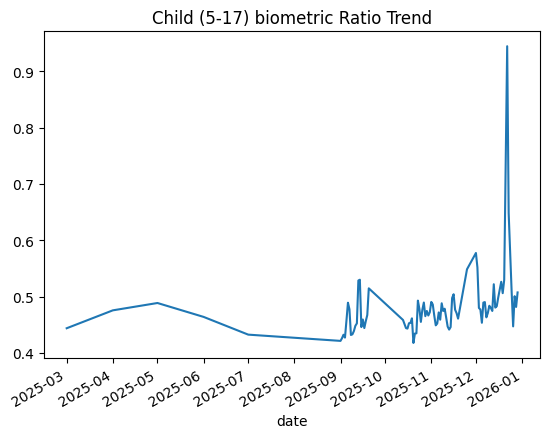

In [73]:
child_trend = (
    df.groupby('date')['child_bio_ratio']
      .mean()
)

child_trend.plot(title='Child (5-17) biometric Ratio Trend')


<Axes: title={'center': 'Adult (17+)) biometric Ratio Trend'}, xlabel='date'>

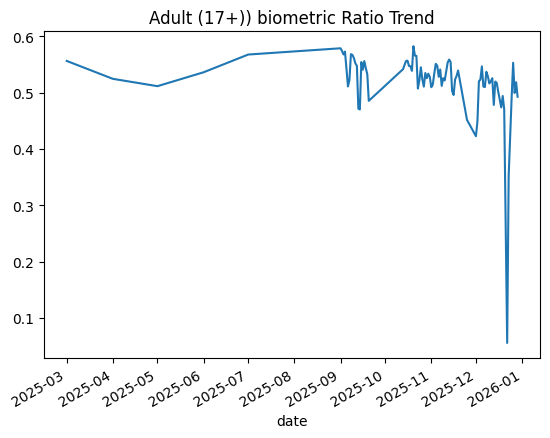

In [74]:
adult_trend = (
    df.groupby('date')['adult_bio_ratio']
      .mean()
)

adult_trend.plot(title='Adult (17+)) biometric Ratio Trend')


<Axes: title={'center': 'Enrollment Ratio Trends (Child vs Adult)'}, xlabel='date'>

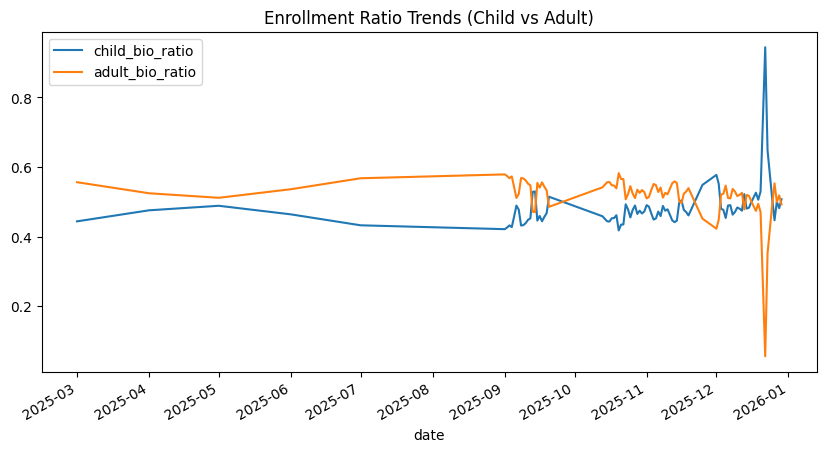

In [75]:
ratio_trends = (
    df.groupby('date')[
        ['child_bio_ratio',
         'adult_bio_ratio']
    ]
    .mean()
)

ratio_trends.plot(
    title='Enrollment Ratio Trends (Child vs Adult)',
    figsize=(10,5)
)


In [76]:
pincode_daily = (
    df.groupby(['date','pincode'])['total_bio_updates']
      .sum()
      .reset_index()
)

threshold = pincode_daily['total_bio_updates'].quantile(0.99)

outliers = pincode_daily[pincode_daily['total_bio_updates'] > threshold]
outliers


date  pincode  total_bio_updates
3       2025-03-01   110005               1391
4       2025-03-01   110006               2427
5       2025-03-01   110007               1460
6       2025-03-01   110008               1690
7       2025-03-01   110009                984
...            ...      ...                ...
1297148 2025-12-19   497001                977
1331209 2025-12-25   491995                811
1343515 2025-12-26   244713               1064
1358862 2025-12-27   110053                985
1358901 2025-12-27   110094                838

[14086 rows x 3 columns]

In [77]:
num_cols

['pincode',
 'bio_age_5_17',
 'bio_age_17_',
 'total_bio_updates',
 'child_bio_ratio',
 'adult_bio_ratio']

<Figure size 1500x1000 with 0 Axes>

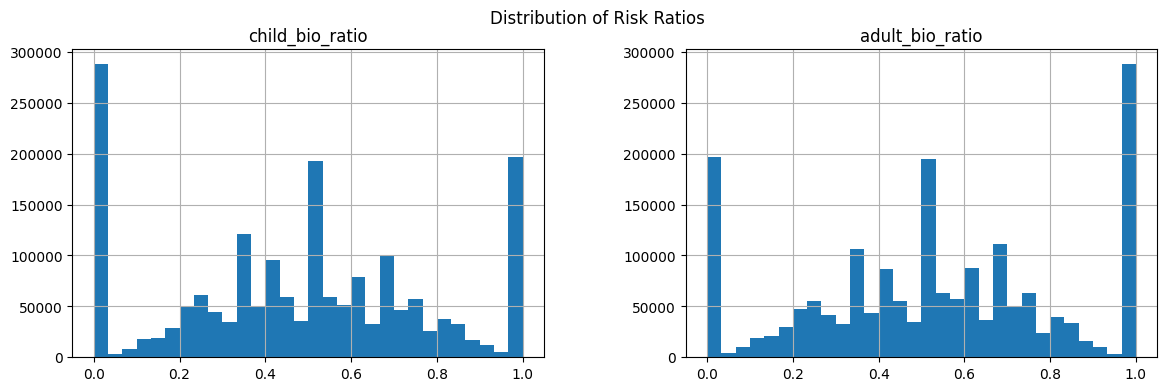

In [78]:
plt.figure(figsize=(15,10))
ratios = [
    "child_bio_ratio",
    "adult_bio_ratio"
]

df[ratios].hist(bins=30, figsize=(14,4))
plt.suptitle("Distribution of Risk Ratios")
plt.show()


In [79]:
district_trend = (
    df.groupby(['date','district'])['total_bio_updates']
      .sum()
      .reset_index()
)

trend = district_trend.groupby('district')['total_bio_updates'].mean()
trend


district
?                1.000000
ANGUL            1.250000
ANUGUL           5.568182
Adilabad      1520.931034
Agar Malwa     202.566265
                 ...     
jajpur           4.240000
nadia            1.000000
rangareddi       1.000000
udhampur         1.000000
yadgir          50.364706
Name: total_bio_updates, Length: 974, dtype: float64

In [80]:
dis = df.groupby('state')['district'].nunique().reset_index(name='unique_districts')
dis


state  unique_districts
0                Andaman and Nicobar Islands                 5
1                             Andhra Pradesh                47
2                          Arunachal Pradesh                25
3                                      Assam                37
4                                      Bihar                47
5                                 Chandigarh                 3
6                               Chhattisgarh                40
7   Dadra and Nagar Haveli and Daman and Diu                 4
8                                      Delhi                13
9                                        Goa                 4
10                                   Gujarat                39
11                                   Haryana                24
12                          Himachal Pradesh                14
13                         Jammu and Kashmir                29
14                                 Jharkhand                34
15                                 Karnataka                54
16                                    Kerala                15
17                                    Ladakh                 2
18                               Lakshadweep                 1
19                            Madhya Pradesh                60
20                               Maharashtra                52
21                                   Manipur                12
22                                 Meghalaya                13
23                                   Mizoram                12
24                                  Nagaland                17
25                                    Odisha                48
26                                Puducherry                 6
27                                    Punjab                27
28                                 Rajasthan                46
29                                    Sikkim                 9
30                                Tamil Nadu                45
31                                 Telangana                40
32                                   Tripura                 9
33                             Uttar Pradesh                90
34                               Uttarakhand                15
35                               West Bengal                58

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35],
 [Text(0, 0, 'Andaman and Nicobar Islands'),
  Text(1, 0, 'Andhra Pradesh'),
  Text(2, 0, 'Arunachal Pradesh'),
  Text(3, 0, 'Assam'),
  Text(4, 0, 'Bihar'),
  Text(5, 0, 'Chandigarh'),
  Text(6, 0, 'Chhattisgarh'),
  Text(7, 0, 'Dadra and Nagar Haveli and Daman and Diu'),
  Text(8, 0, 'Delhi'),
  Text(9, 0, 'Goa'),
  Text(10, 0, 'Gujarat'),
  Text(11, 0, 'Haryana'),
  Text(12, 0, 'Himachal Pradesh'),
  Text(13, 0, 'Jammu and Kashmir'),
  Text(14, 0, 'Jharkhand'),
  Text(15, 0, 'Karnataka'),
  Text(16, 0, 'Kerala'),
  Text(17, 0, 'Ladakh'),
  Text(18, 0, 'Lakshadweep'),
  Text(19, 0, 'Madhya Pradesh'),
  Text(20, 0, 'Maharashtra'),
  Text(21, 0, 'Manipur'),
  Text(22, 0, 'Meghalaya'),
  Text(23, 0, 'Mizoram'),
  Text(24, 0, 'Nagaland'),
  Text(25, 0, 'Odisha'),
  Text(26, 0, 'Puduch

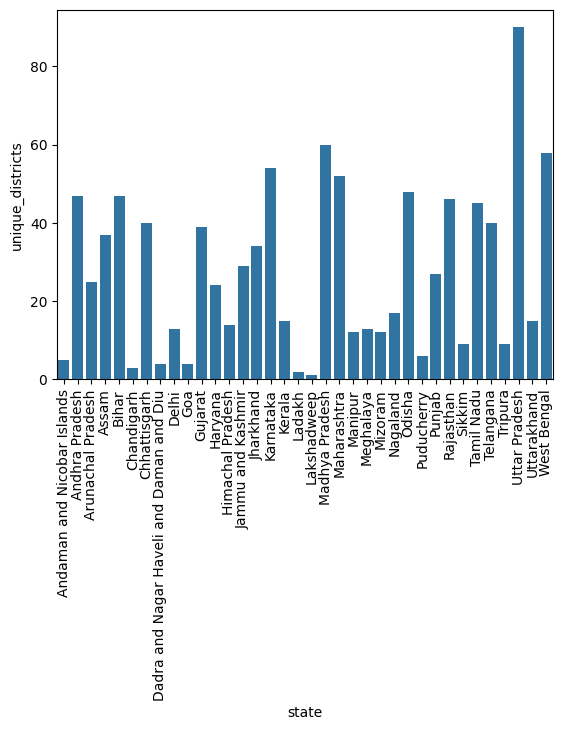

In [81]:
sns.barplot(data=dis, x='state', y='unique_districts')
plt.xticks(rotation=90)

In [82]:
num_cols

['pincode',
 'bio_age_5_17',
 'bio_age_17_',
 'total_bio_updates',
 'child_bio_ratio',
 'adult_bio_ratio']

In [83]:
# unique districts per state
dis = df.groupby('state')['district'].nunique().reset_index(name='unique_districts')

# merge with main dataframe
df2 = df.merge(dis, on='state', how='left')


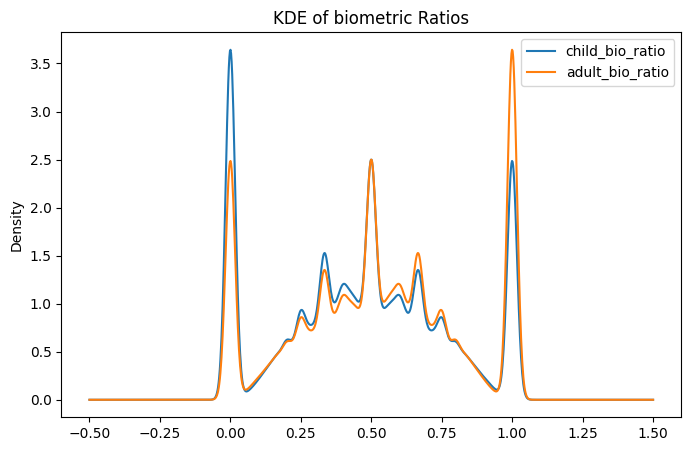

In [84]:
import matplotlib.pyplot as plt

df2[['child_bio_ratio',
     'adult_bio_ratio']].plot(
    kind='kde',
    title='KDE of biometric Ratios',
    figsize=(8,5)
)

plt.show()


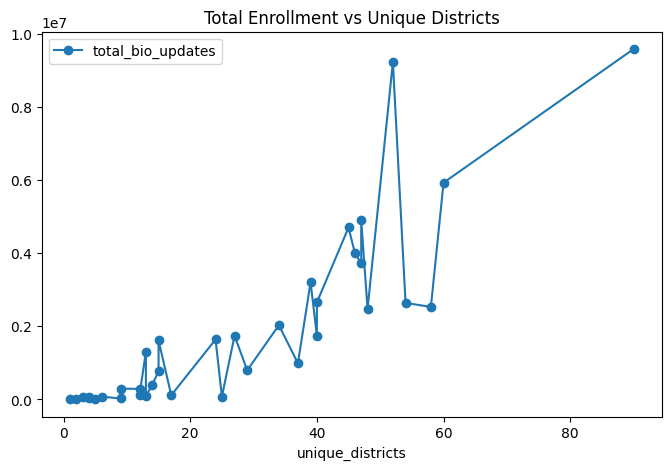

In [85]:
state_enroll = (
    df2.groupby('state')
       .agg(
           total_bio_updates=('total_bio_updates','sum'),
           unique_districts=('unique_districts','first')
       )
       .sort_values('unique_districts')
)

state_enroll.plot(
    x='unique_districts',
    y='total_bio_updates',
    # kind='scatter',
    kind='line',
    marker='o',
    title='Total Enrollment vs Unique Districts',
    figsize=(8,5)
)

plt.show()


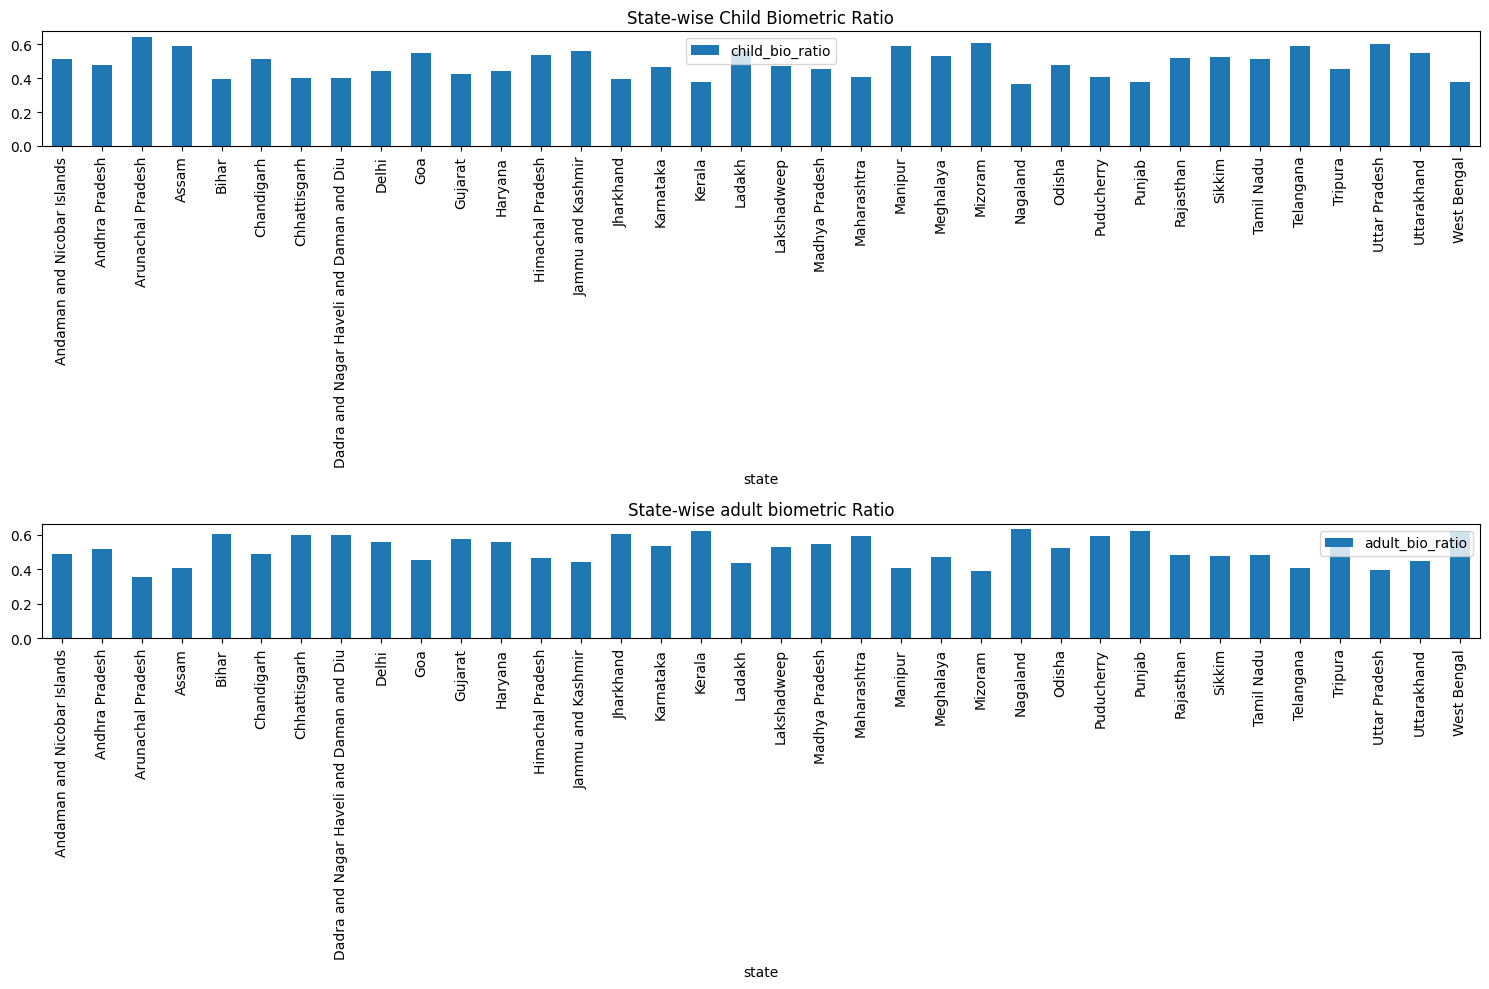

In [86]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 1, figsize=(15,10))
axes = axes.flatten()

# 1️⃣ Child enrollment ratio
gr1 = df.groupby('state')['child_bio_ratio'].mean().reset_index()
gr1.plot(
    kind='bar',
    x='state',
    y='child_bio_ratio',
    ax=axes[0],
    title='State-wise Child Biometric Ratio'
)

# 2️⃣ Teen enrollment ratio
gr2 = df.groupby('state')['adult_bio_ratio'].mean().reset_index()
gr2.plot(
    kind='bar',
    x='state',
    y='adult_bio_ratio',
    ax=axes[1],
    title='State-wise adult biometric Ratio'
)


plt.tight_layout()
plt.show()

In [87]:
num_cols, cat_cols

(['pincode',
  'bio_age_5_17',
  'bio_age_17_',
  'total_bio_updates',
  'child_bio_ratio',
  'adult_bio_ratio'],
 ['state', 'district', 'month_name', 'day_name'])

In [88]:
state_age_pct = (
    df.groupby('state')
      .agg(
          child_enrollments=('bio_age_5_17','sum'),
          adult_enrollments=('bio_age_17_','sum'),
          total_enrollments=('total_bio_updates','sum')
      )
)

state_age_pct['child_pct'] = (state_age_pct['child_enrollments'] / state_age_pct['total_enrollments']) * 100
state_age_pct['adult_pct'] = (state_age_pct['adult_enrollments'] / state_age_pct['total_enrollments']) * 100

state_age_pct = state_age_pct.reset_index()
state_age_pct

state  child_enrollments  \
0                Andaman and Nicobar Islands              11806   
1                             Andhra Pradesh            2241467   
2                          Arunachal Pradesh              42894   
3                                      Assam             596624   
4                                      Bihar            2208141   
5                                 Chandigarh              49171   
6                               Chhattisgarh             884553   
7   Dadra and Nagar Haveli and Daman and Diu              16362   
8                                      Delhi             556237   
9                                        Goa              34244   
10                                   Gujarat            1460655   
11                                   Haryana             693667   
12                          Himachal Pradesh             191566   
13                         Jammu and Kashmir             420349   
14                                 Jharkhand             876613   
15                                 Karnataka            1244999   
16                                    Kerala             647939   
17                                    Ladakh               2809   
18                               Lakshadweep               2226   
19                            Madhya Pradesh            3200117   
20                               Maharashtra            3512712   
21                                   Manipur             166465   
22                                 Meghalaya              36531   
23                                   Mizoram              85531   
24                                  Nagaland              32561   
25                                    Odisha            1211389   
26                                Puducherry              27046   
27                                    Punjab             700157   
28                                 Rajasthan            2066747   
29                                    Sikkim              11932   
30                                Tamil Nadu            2227252   
31                                 Telangana             946497   
32                                   Tripura             147535   
33                             Uttar Pradesh            6207105   
34                               Uttarakhand             424441   
35                               West Bengal            1040512   

    adult_enrollments  total_enrollments  child_pct  adult_pct  
0                8892              20698  57.039327  42.960673  
1             1473166            3714633  60.341547  39.658453  
2               29500              72394  59.250767  40.749233  
3              386098             982722  60.711371  39.288629  
4             2689446            4897587  45.086305  54.913695  
5               25311              74482  66.017293  33.982707  
6             1764176            2648729  33.395376  66.604624  
7               22906              39268  41.667516  58.332484  
8              748125            1304362  42.644373  57.355627  
9               34153              68397  50.066523  49.933477  
10            1735859            3196514  45.695248  54.304752  
11             941787            1635454  42.414339  57.585661  
12             204668             396234  48.346684  51.653316  
13             371298             791647  53.098035  46.901965  
14            1149684            2026297  43.261822  56.738178  
15            1390955            2635954  47.231439  52.768561  
16             961791            1609730  40.251409  59.748591  
17               2954               5763  48.741975  51.258025  
18               2594               4820  46.182573  53.817427  
19            2723654            5923771  54.021619  45.978381  
20            5713427            9226139  38.073478  61.926522  
21             116122             282587  58.907522  41.092478  
22              51095              87626  41.689681  58.310319  

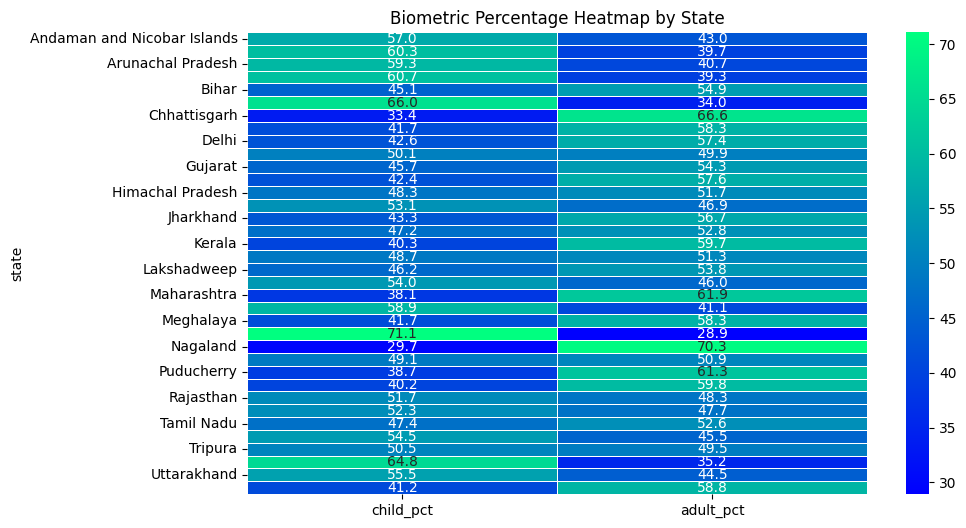

In [89]:
import seaborn as sns

heat = state_age_pct.set_index('state')[['child_pct','adult_pct']]

plt.figure(figsize=(10,6))
sns.heatmap(heat, annot=True, fmt=".1f", cmap='winter', linewidth=0.6)
plt.title('Biometric Percentage Heatmap by State')
plt.show()


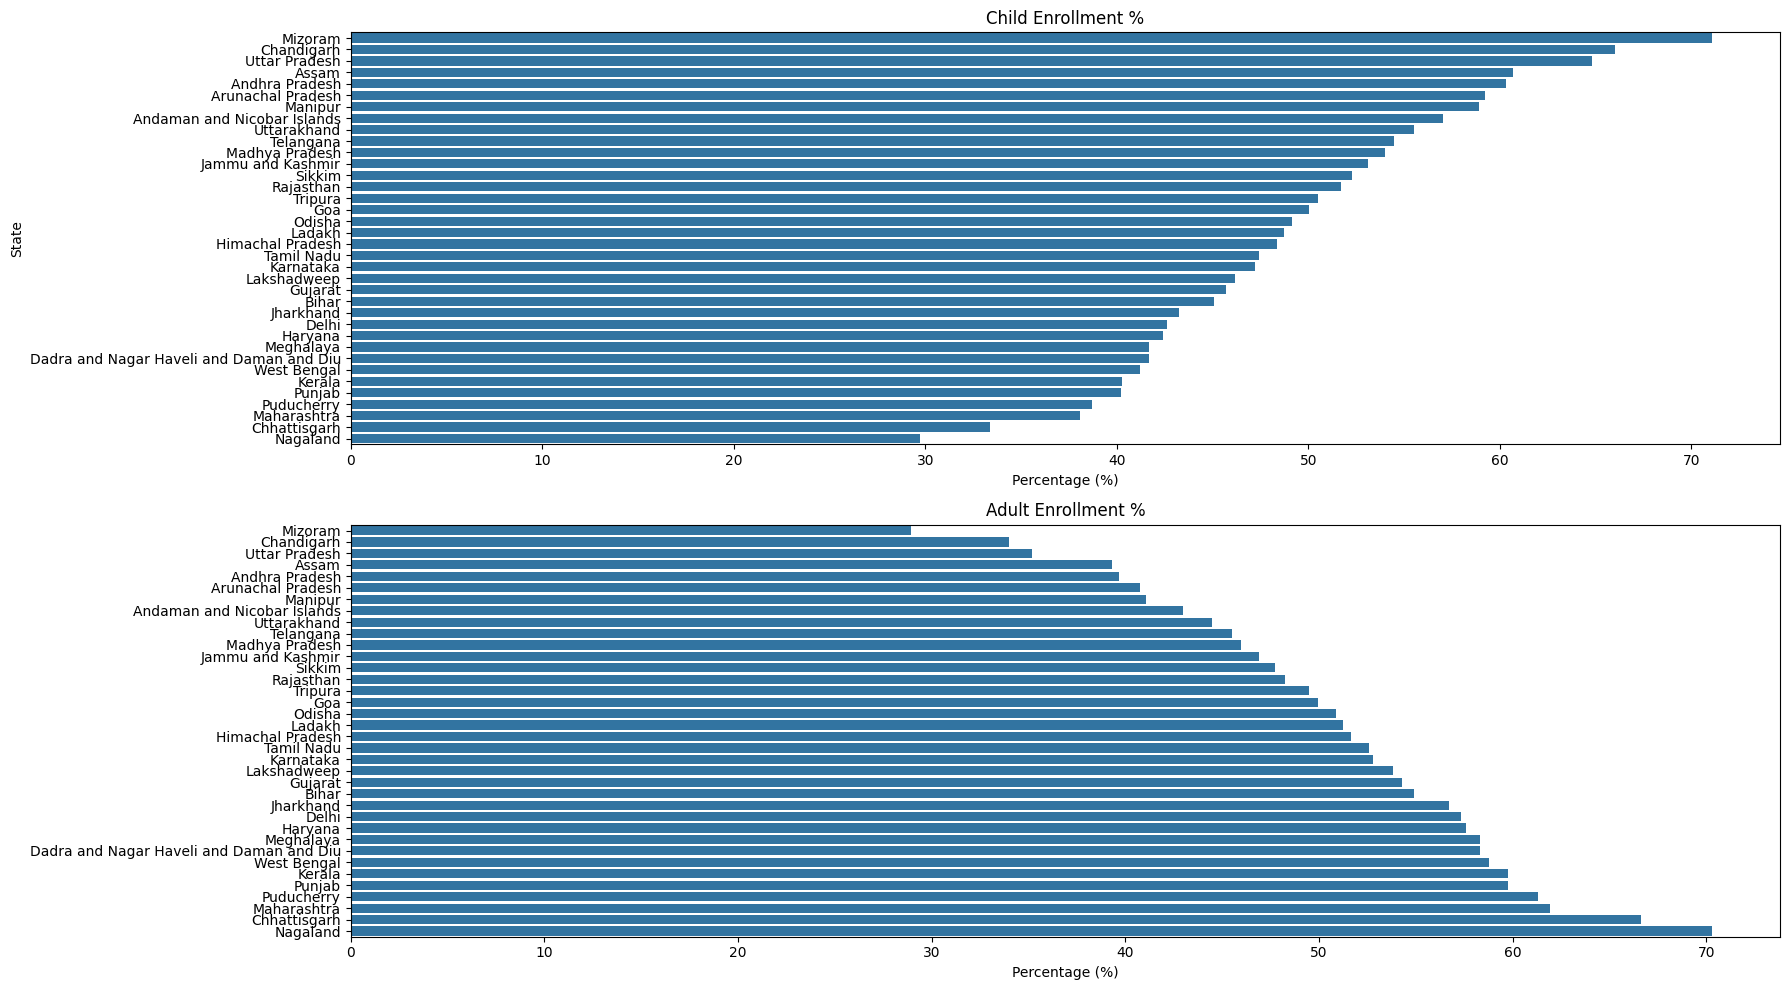

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 1, figsize=(18,10), sharey=True)

# Child %
sns.barplot(
    data=state_age_pct.sort_values('child_pct', ascending=False),
    x='child_pct',
    y='state',
    ax=axes[0]
)
axes[0].set_title('Child Enrollment %')
axes[0].set_xlabel('Percentage (%)')
axes[0].set_ylabel('State')

# Adult %
sns.barplot(
    data=state_age_pct.sort_values('adult_pct', ascending=False),
    x='adult_pct',
    y='state',
    ax=axes[1]
)
axes[1].set_title('Adult Enrollment %')
axes[1].set_xlabel('Percentage (%)')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

<Axes: >

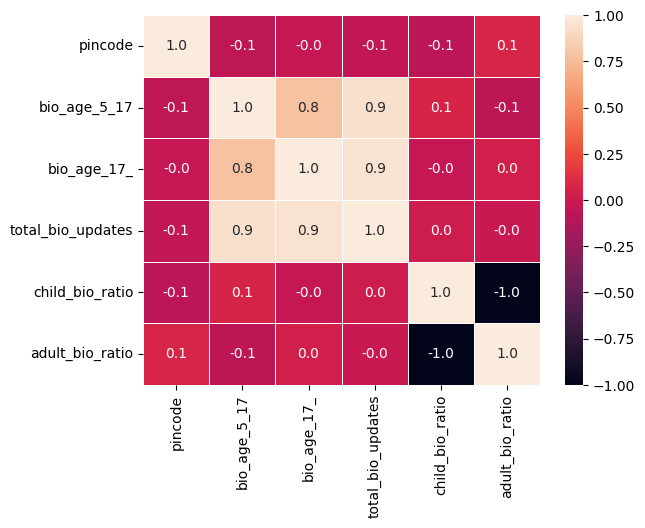

In [91]:
sns.heatmap(df[num_cols].corr(), annot=True, fmt='.1f', linewidth=0.6)

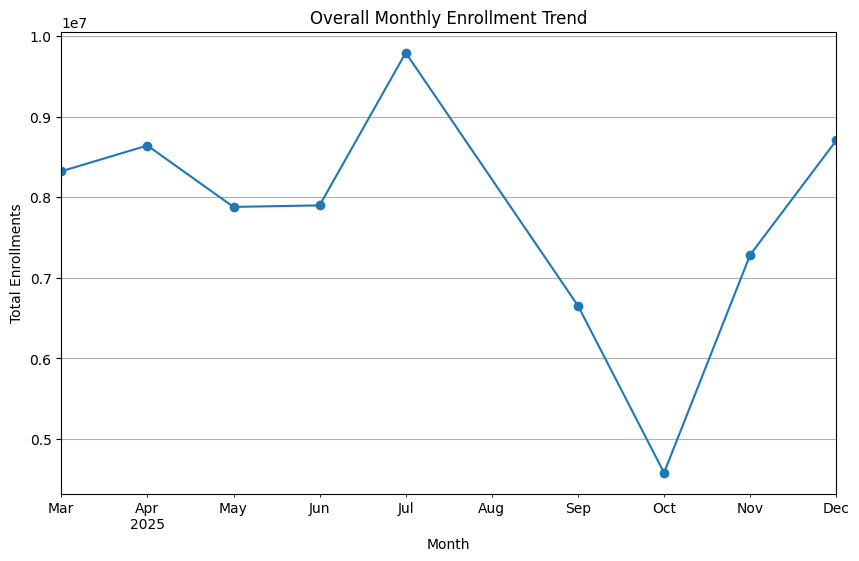

In [92]:
monthly_bio_updates = df.groupby('month')['total_bio_updates'].sum()

plt.figure(figsize=(10, 6))
monthly_bio_updates.plot(kind='line', marker='o')
plt.title('Overall Monthly Enrollment Trend')
plt.xlabel('Month')
plt.ylabel('Total Enrollments')
plt.grid(True)
plt.show()

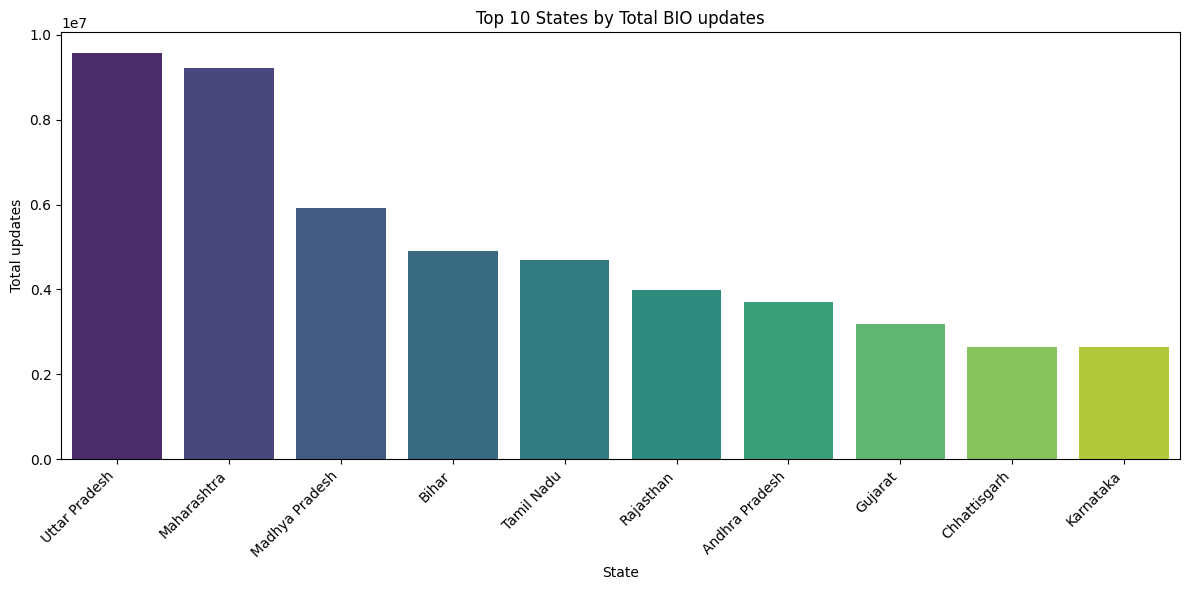

In [93]:
state_total_updates = df.groupby('state')['total_bio_updates'].sum().reset_index()
top_10_states = state_total_updates.sort_values(by='total_bio_updates', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='state', y='total_bio_updates', data=top_10_states, hue='state', palette='viridis', legend=False)
plt.title('Top 10 States by Total BIO updates')
plt.xlabel('State')
plt.ylabel('Total updates')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

/tmp/ipython-input-1488187849.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='day_name', y='total_bio_updates', data=daily_updates, palette='cubehelix')


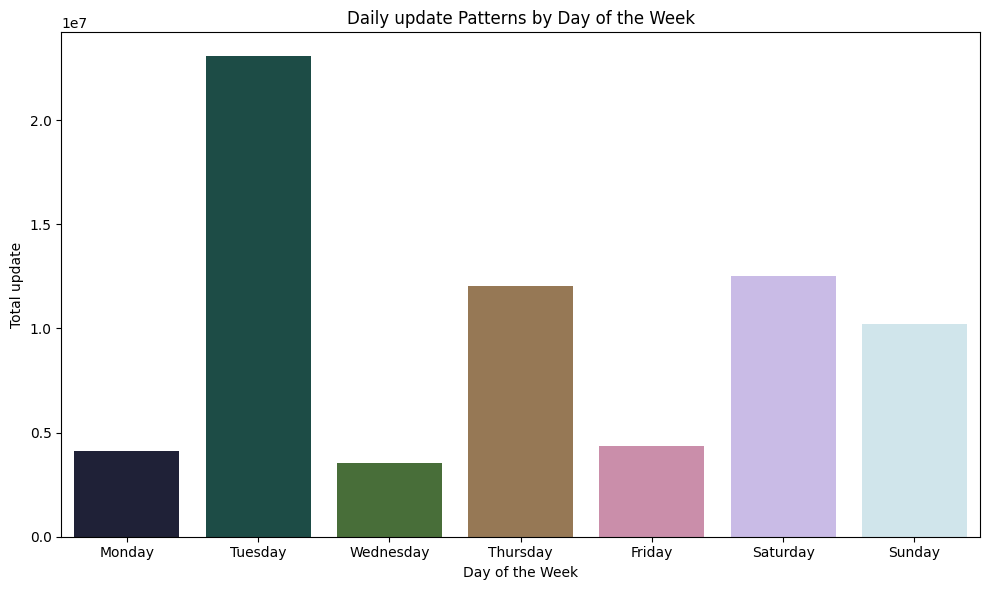

In [95]:
daily_updates = df.groupby('day_name')['total_bio_updates'].sum().reset_index()

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_updates['day_name'] = pd.Categorical(daily_updates['day_name'], categories=day_order, ordered=True)
daily_updates = daily_updates.sort_values('day_name')

plt.figure(figsize=(10, 6))
sns.barplot(x='day_name', y='total_bio_updates', data=daily_updates, palette='cubehelix')
plt.title('Daily update Patterns by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total update')
plt.tight_layout()
plt.show()

In [94]:
monthly_df_bio.head()

state  district    month  bio_age_5_17  bio_age_17_  \
0  Andaman and Nicobar Islands  Andamans  2025-03            16          193   
1  Andaman and Nicobar Islands  Andamans  2025-04            17          167   
2  Andaman and Nicobar Islands  Andamans  2025-05            22          158   
3  Andaman and Nicobar Islands  Andamans  2025-06            11          129   
4  Andaman and Nicobar Islands  Andamans  2025-07            20          239   

   total_bio_updates  child_bio_ratio  adult_bio_ratio  bio_risk_score  
0                209         0.076555         0.923445        0.330622  
1                184         0.092391         0.907609        0.336957  
2                180         0.122222         0.877778        0.348889  
3                140         0.078571         0.921429        0.331429  
4                259         0.077220         0.922780        0.330888

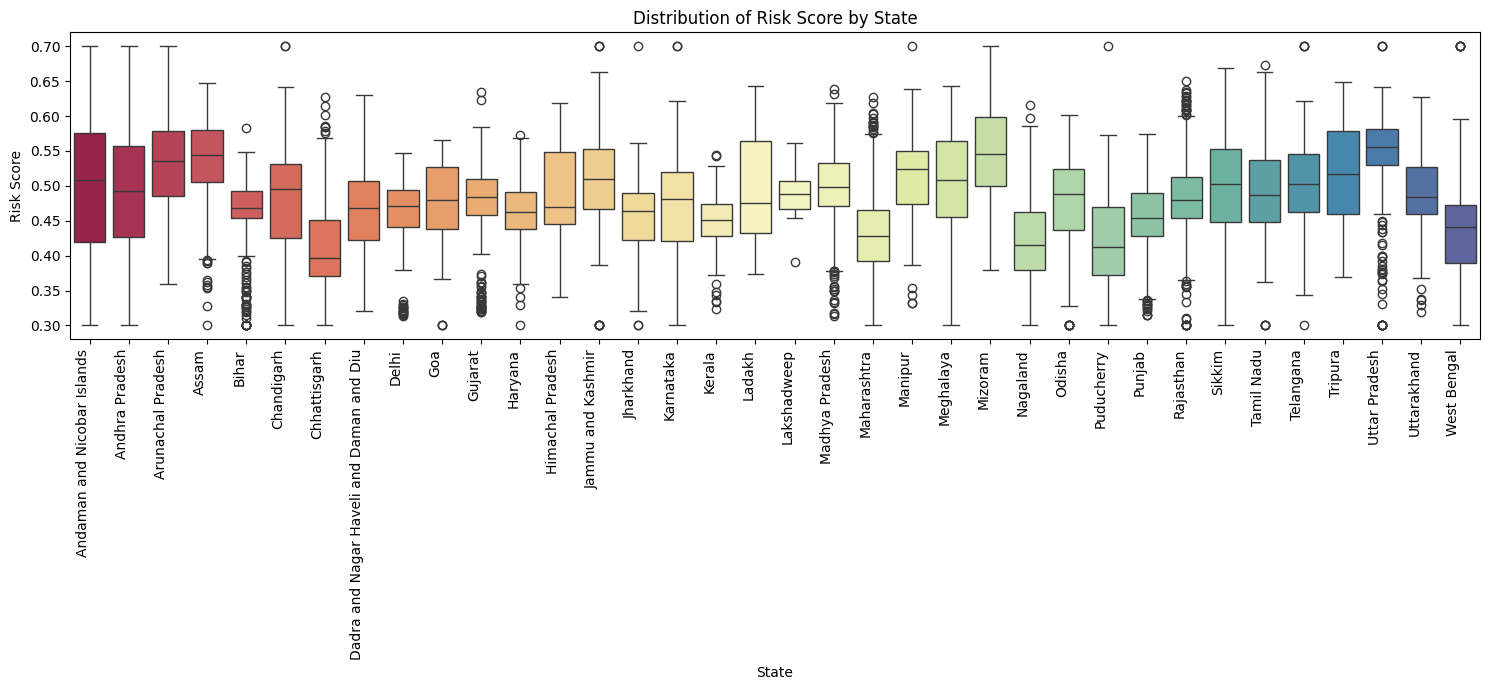

In [96]:
plt.figure(figsize=(15, 7))
sns.boxplot(x='state', y='bio_risk_score', data=monthly_df_bio, hue='state', palette='Spectral', legend=False)
plt.title('Distribution of Risk Score by State')
plt.xlabel('State')
plt.ylabel('Risk Score')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

In [97]:
monthly_df_bio.head()

state  district    month  bio_age_5_17  bio_age_17_  \
0  Andaman and Nicobar Islands  Andamans  2025-03            16          193   
1  Andaman and Nicobar Islands  Andamans  2025-04            17          167   
2  Andaman and Nicobar Islands  Andamans  2025-05            22          158   
3  Andaman and Nicobar Islands  Andamans  2025-06            11          129   
4  Andaman and Nicobar Islands  Andamans  2025-07            20          239   

   total_bio_updates  child_bio_ratio  adult_bio_ratio  bio_risk_score  
0                209         0.076555         0.923445        0.330622  
1                184         0.092391         0.907609        0.336957  
2                180         0.122222         0.877778        0.348889  
3                140         0.078571         0.921429        0.331429  
4                259         0.077220         0.922780        0.330888

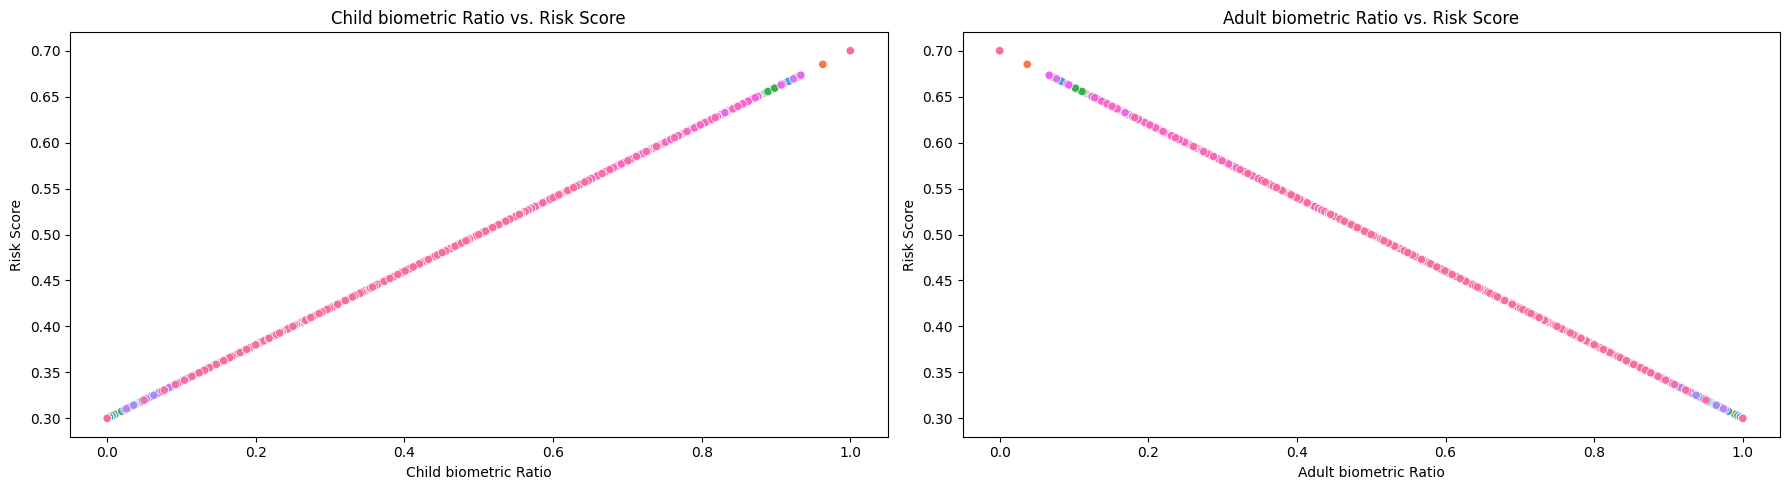

In [98]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x='child_bio_ratio', y='bio_risk_score', data=monthly_df_bio, hue='state', legend=False)
plt.title('Child biometric Ratio vs. Risk Score')
plt.xlabel('Child biometric Ratio')
plt.ylabel('Risk Score')


plt.subplot(1, 2, 2)
sns.scatterplot(x='adult_bio_ratio', y='bio_risk_score', data=monthly_df_bio, hue='state', legend=False)
plt.title('Adult biometric Ratio vs. Risk Score')
plt.xlabel('Adult biometric Ratio')
plt.ylabel('Risk Score')

plt.tight_layout()
plt.show()

# Task
Please provide a comprehensive summary of the patterns and insights identified in the `df` and `monthly_df_bio` DataFrames. Include observations on state performance in biometric updates, monthly and daily trends, age-group ratios (child vs. adult), district diversity, and the distribution of the `bio_risk_score`. Additionally, perform the following new analyses:

1.  Calculate and visualize the monthly trend of the `bio_risk_score` for the top 5 states (based on total biometric updates). Use a line plot for this visualization.
2.  For 'Uttar Pradesh' (as an example of a top state), analyze and visualize the distribution of `total_bio_updates` across its districts using a bar plot.
3.  Calculate and visualize the average `child_bio_ratio` and `adult_bio_ratio` for each day of the week to identify any daily patterns.

Finally, integrate the results of these new analyses with the existing observations to present a comprehensive summary of all identified patterns and insights.

## Summarize Existing Patterns

### Subtask:
Provide a detailed summary of the hidden patterns and insights already identified through the analysis performed in the notebook. This includes observations on state performance, monthly and daily trends, age-group ratios, district diversity, and risk score distributions.


## Summary of Existing Patterns and Insights

Based on the analysis performed, several key patterns and insights regarding biometric updates across different states, months, days, and age groups have been identified:

### 1. State Performance in Biometric Updates
*   **Top Performing States**: Uttar Pradesh, Maharashtra, Madhya Pradesh, Bihar, and Tamil Nadu consistently show the highest total biometric updates. Uttar Pradesh leads significantly with over 9.5 million updates.
*   **State-wise Activity**: The `state_wise_updates` dataframe and the corresponding bar plot show varying levels of activity across states, with some states contributing significantly more to the total volume of updates.

### 2. Monthly and Daily Trends
*   **Monthly Trend**: The overall monthly trend in `total_bio_updates` shows fluctuations, with December, April, and July appearing to have higher total updates, while October shows a dip. There's a noticeable increase towards the end of the year.
*   **Daily Trend**: Daily update patterns reveal that Tuesdays have significantly higher biometric updates, followed by Saturday and Sunday. Mondays, Wednesdays, Thursdays, and Fridays generally have lower activity compared to Tuesdays, Saturdays, and Sundays.
*   **State-wise Monthly Variations (Heatmap)**: The heatmap `summary` indicates that update activity varies considerably across states and months. While some states like Andhra Pradesh and Tamil Nadu show high activity across many months, others have more concentrated periods of activity. December consistently shows high numbers across almost all states.

### 3. Age-Group Ratios (Child vs. Adult)
*   **Overall Trends**: The `ratio_trends` plot shows that the mean `adult_bio_ratio` is generally higher than `child_bio_ratio` over time, although both ratios fluctuate. There are periods where the child biometric ratio slightly overtakes the adult ratio, indicating dynamic update priorities.
*   **State-wise Ratios**: The bar plots of `child_bio_ratio` and `adult_bio_ratio` by state highlight significant variations. States like Mizoram and Nagaland have very high child biometric ratios, while Chhattisgarh and Meghalaya show higher adult biometric ratios. Andaman and Nicobar Islands and Bihar also have a higher proportion of adult biometric updates.
*   **Percentage Contribution (Heatmap)**: The `state_age_pct` heatmap further illustrates these differences, showing the percentage contribution of child and adult enrollments to the total per state. For instance, Uttar Pradesh has a high `child_pct` (over 64%), while Maharashtra has a high `adult_pct` (over 61%).

### 4. District Diversity
*   **Unique Districts per State**: The `dis` dataframe and its bar plot show the number of unique districts contributing data for each state. Uttar Pradesh and Madhya Pradesh have the highest number of unique districts (90 and 60 respectively), indicating broad geographical coverage within these states. Lakshadweep has only one unique district. This suggests varying levels of administrative granularity or data collection scope across states.
*   **Total Updates vs. Unique Districts**: The line plot of `Total Enrollment vs Unique Districts` suggests a positive correlation: states with a higher number of unique districts tend to have a higher total number of biometric updates, which is intuitively expected due to larger geographical and population coverage.

### 5. Risk Score Distributions
*   **`bio_risk_score`**: This calculated score (weighted average of child and adult biometric ratios) varies across states. The box plot shows the distribution of this score by state. Some states exhibit a wider range of risk scores, implying more variability in their child/adult biometric update proportions across districts and months.
*   **Relationship with Ratios**: Scatter plots confirm that the `bio_risk_score` has a strong positive correlation with `child_bio_ratio` (due to the 0.7 weight) and a weaker positive correlation with `adult_bio_ratio` (0.3 weight). States with generally higher child biometric ratios will naturally exhibit higher risk scores.

### Other Observations:
*   **Outliers**: The analysis of `pincode_daily` identified specific pincodes and dates with unusually high `total_bio_updates`, indicating potential hotspots or administrative events that drive high activity.
*   **Duplication**: The initial check showed a significant number of duplicate entries based on `date`, `state`, `district`, and `pincode`, which were subsequently handled or noted (in monthly aggregation context). This is a crucial data quality insight.

Overall, the dataset reveals a complex interplay of geographical, temporal, and demographic factors influencing biometric update patterns across India.

## Analyze Monthly Trend of Risk Score by Top States

### Subtask:
Calculate and visualize the monthly trend of the `bio_risk_score` for the top 5 states (based on total biometric updates). This will show if the risk profile of these states changes over time. A line plot will be used for visualization.


**Reasoning**:
First, extract the names of the top 5 states from the `top_10_states` DataFrame. This list will be used to filter the monthly biometric data to focus on the most relevant states for risk score analysis.



**Reasoning**:
The error `TypeError: Invalid object type at position 0` during plotting likely occurs because the 'month' column is a pandas Period object, which seaborn's lineplot might struggle to interpret directly as a numeric type for the x-axis. To fix this, I will convert the 'month' column to a datetime object before plotting.



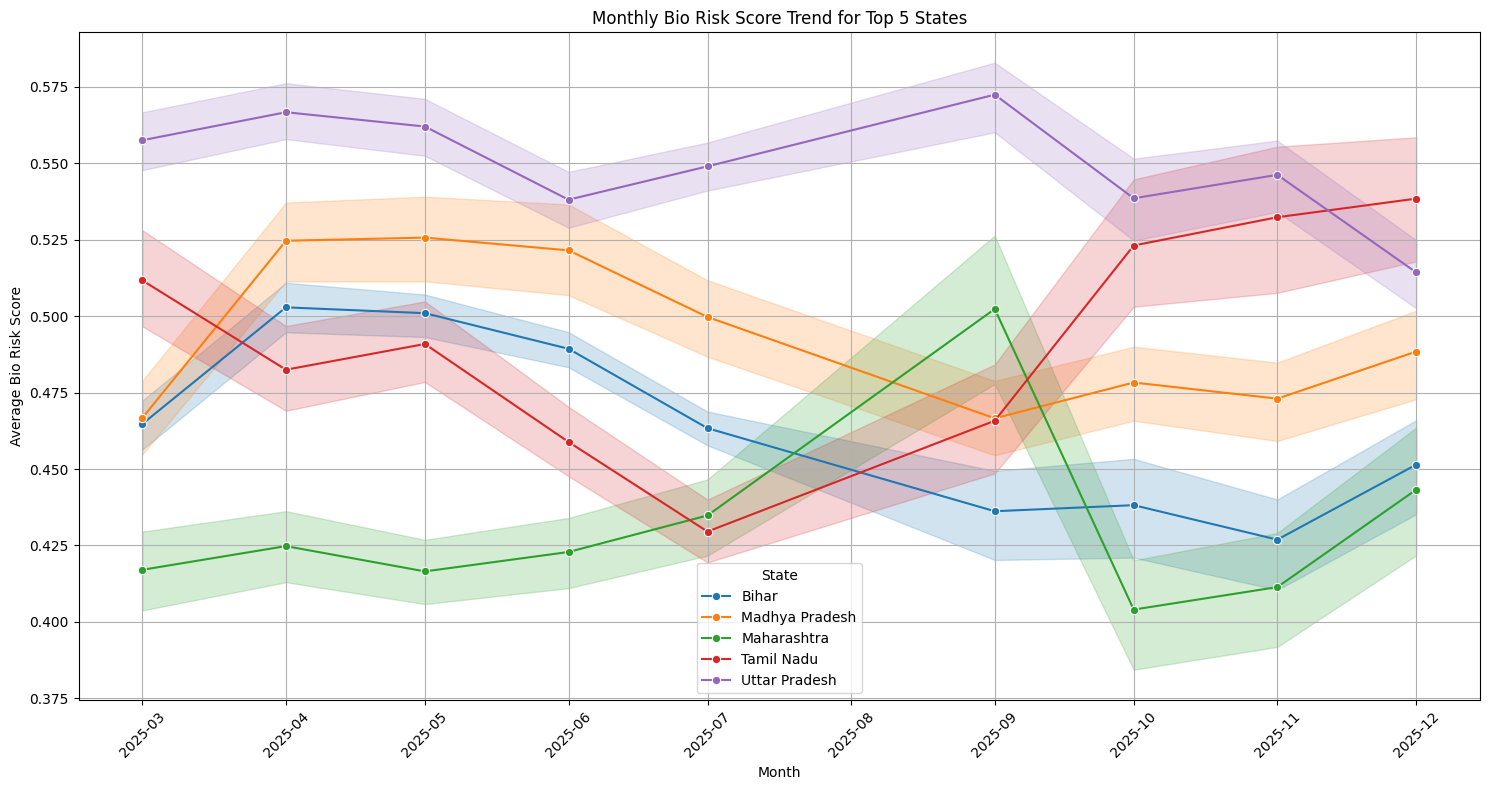

In [100]:
top_5_states = top_10_states['state'].head(5).tolist()
top_5_states_df = monthly_df_bio[monthly_df_bio['state'].isin(top_5_states)].copy()

# Convert 'month' from Period to datetime for plotting
top_5_states_df['month'] = top_5_states_df['month'].dt.to_timestamp()

plt.figure(figsize=(15, 8))
sns.lineplot(data=top_5_states_df, x='month', y='bio_risk_score', hue='state', marker='o')
plt.title('Monthly Bio Risk Score Trend for Top 5 States')
plt.xlabel('Month')
plt.ylabel('Average Bio Risk Score')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='State')
plt.tight_layout()
plt.show()

**Reasoning**:
To analyze the distribution of `total_bio_updates` across districts for 'Uttar Pradesh', I will first filter the main DataFrame `df` for the state 'Uttar Pradesh'. Then, I will group the filtered data by 'district' and calculate the sum of `total_bio_updates` for each district. Finally, I will visualize this distribution using a bar plot to show the contribution of each district.



/tmp/ipython-input-3390585202.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=up_districts, x='district', y='total_bio_updates', palette='viridis')


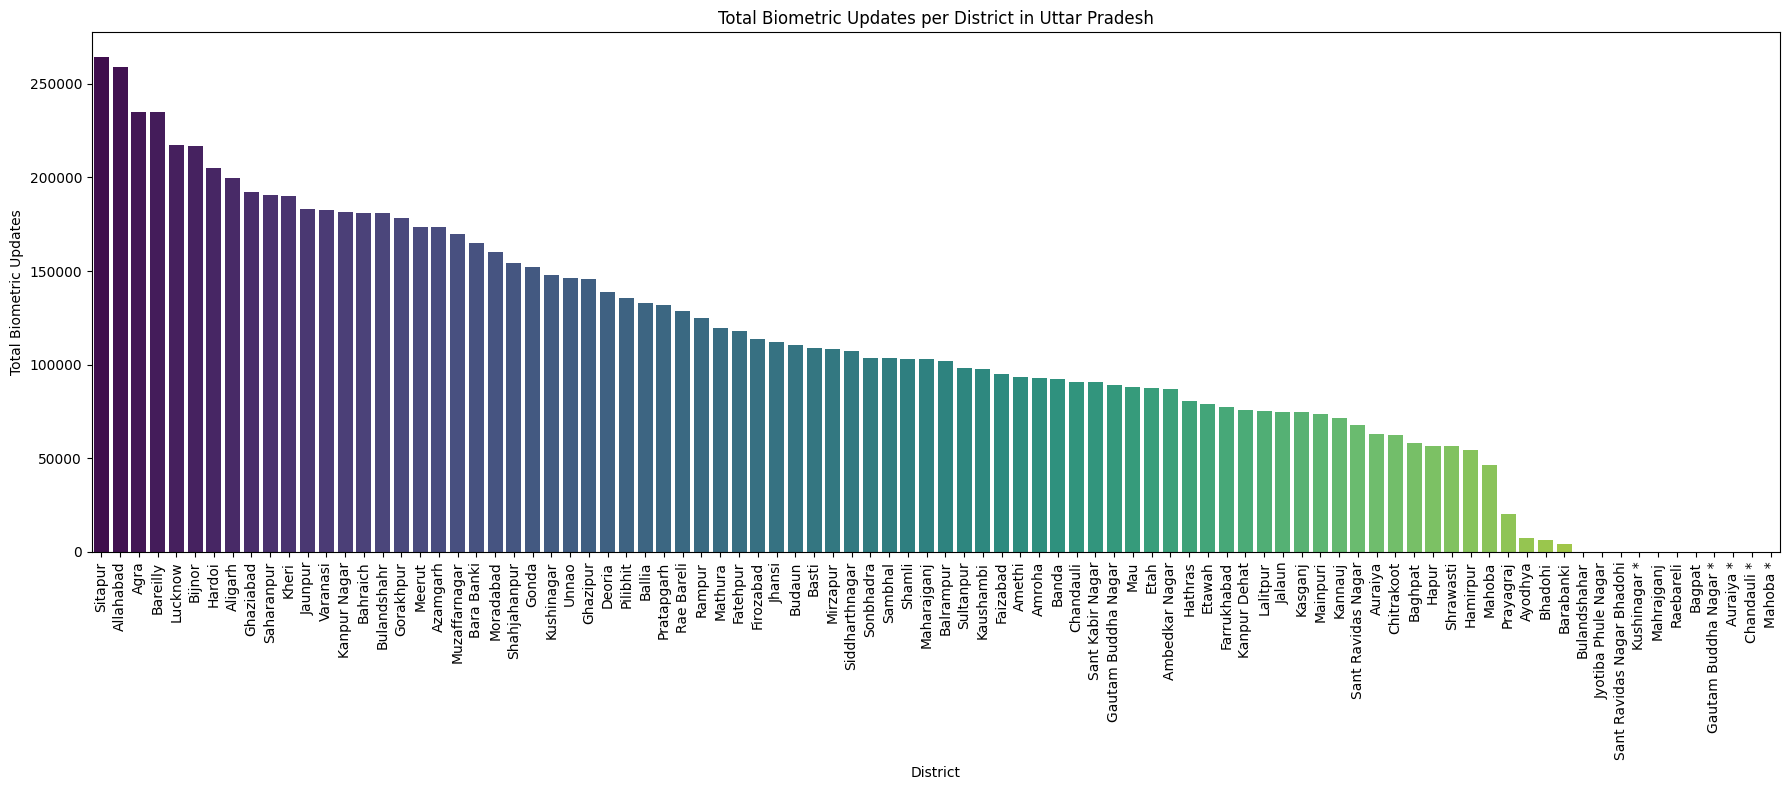

In [101]:
up_districts = (
    df[df['state'] == 'Uttar Pradesh']
    .groupby('district')['total_bio_updates']
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

plt.figure(figsize=(18, 8))
sns.barplot(data=up_districts, x='district', y='total_bio_updates', palette='viridis')
plt.title('Total Biometric Updates per District in Uttar Pradesh')
plt.xlabel('District')
plt.ylabel('Total Biometric Updates')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Reasoning**:
The previous code generated a `FutureWarning` because `palette` was used without assigning a `hue` in `sns.barplot`. To resolve this and ensure future compatibility, I will explicitly set `hue='district'` and `legend=False` in the `sns.barplot` call.



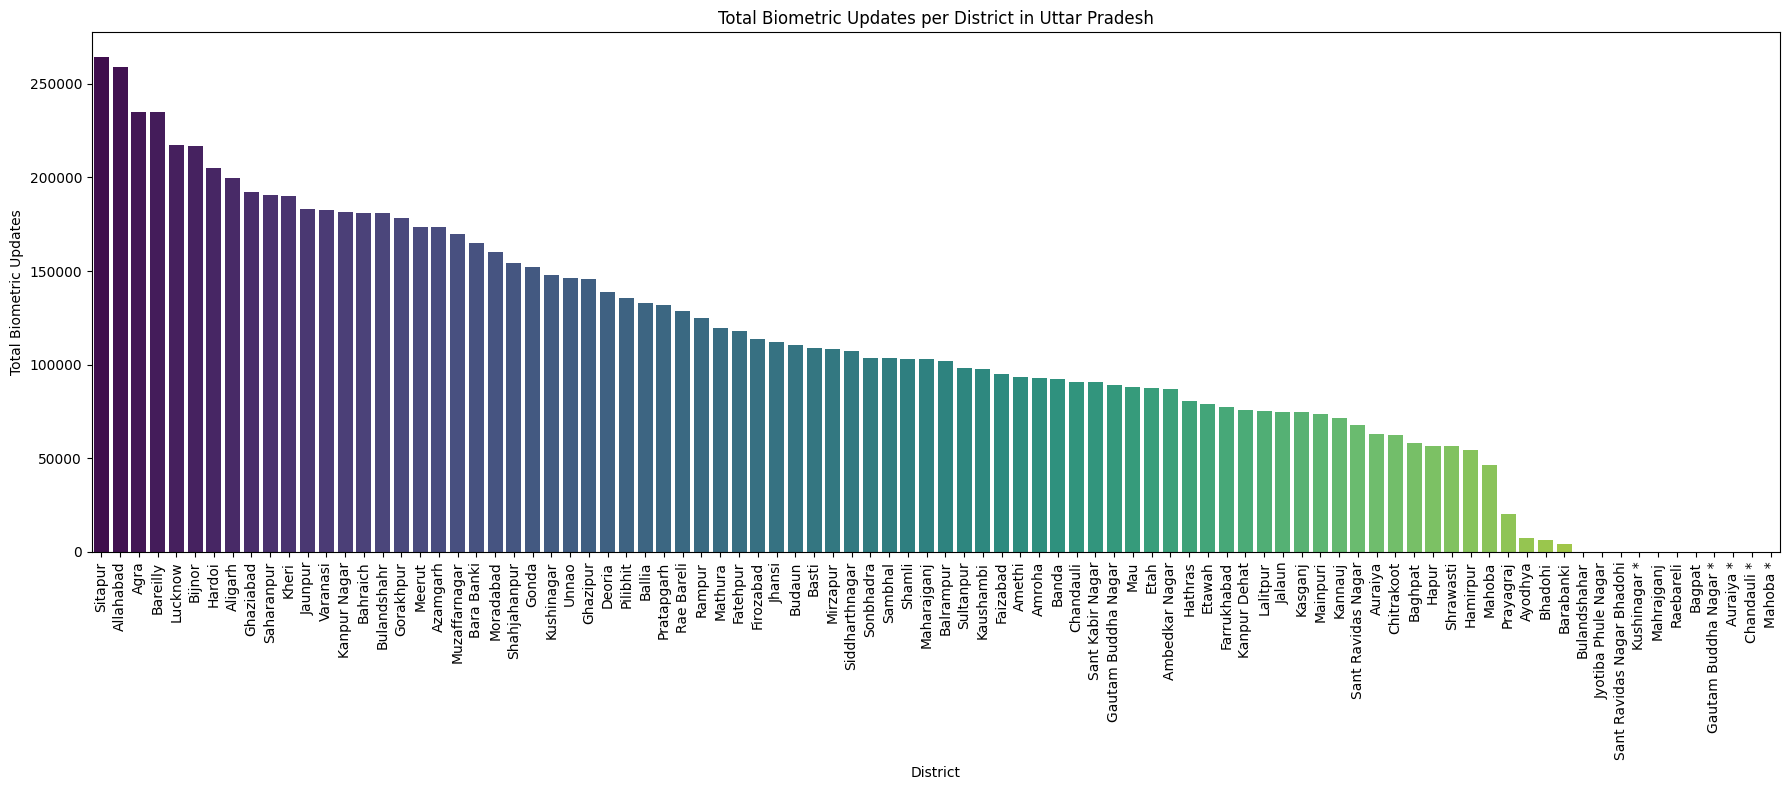

In [145]:
up_districts = (
    df[df['state'] == 'Uttar Pradesh']
    .groupby('district')['total_bio_updates']
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

plt.figure(figsize=(18, 8))
sns.barplot(data=up_districts, x='district', y='total_bio_updates', hue='district', palette='viridis', legend=False)
plt.title('Total Biometric Updates per District in Uttar Pradesh')
plt.xlabel('District')
plt.ylabel('Total Biometric Updates')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Reasoning**:
To analyze and visualize the average `child_bio_ratio` and `adult_bio_ratio` for each day of the week, I will first group the main DataFrame `df` by `day_name` and calculate the mean of both ratio columns. Then, I will sort the days of the week in a logical order to ensure proper visualization. Finally, I will use bar plots to visualize the average ratios for each day.



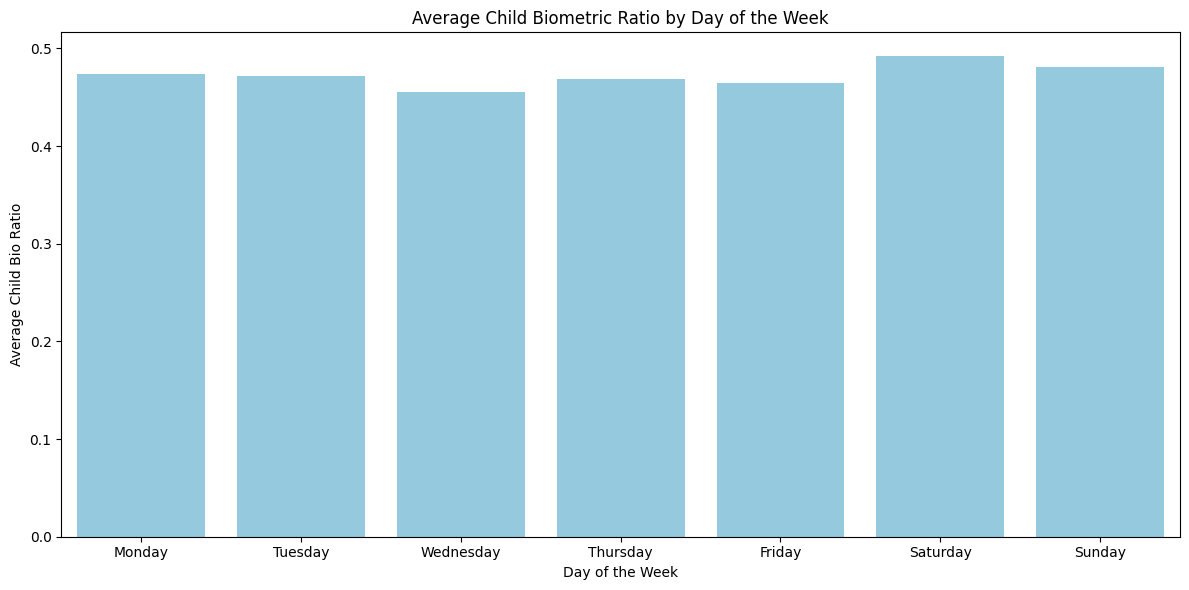

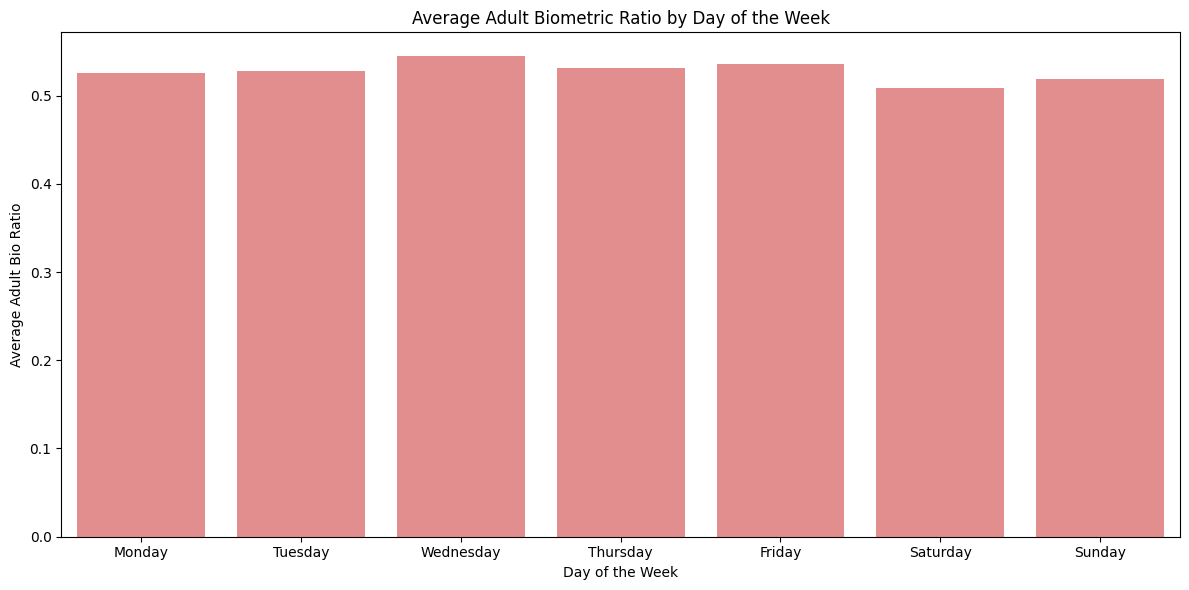

In [102]:
daily_ratios = (
    df.groupby('day_name')[['child_bio_ratio', 'adult_bio_ratio']]
    .mean()
    .reset_index()
)

# Define the order of days of the week for proper plotting
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_ratios['day_name'] = pd.Categorical(daily_ratios['day_name'], categories=day_order, ordered=True)
daily_ratios = daily_ratios.sort_values('day_name')

plt.figure(figsize=(12, 6))
sns.barplot(x='day_name', y='child_bio_ratio', data=daily_ratios, color='skyblue')
plt.title('Average Child Biometric Ratio by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Child Bio Ratio')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='day_name', y='adult_bio_ratio', data=daily_ratios, color='lightcoral')
plt.title('Average Adult Biometric Ratio by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Adult Bio Ratio')
plt.tight_layout()
plt.show()

## Comprehensive Summary of Patterns and Insights

Based on the initial Exploratory Data Analysis and the newly performed analyses, the following comprehensive patterns and insights regarding biometric updates across different states, months, days, and age groups have been identified:

### 1. State Performance in Biometric Updates
*   **Top Performing States**: Uttar Pradesh, Maharashtra, Madhya Pradesh, Bihar, and Tamil Nadu consistently show the highest total biometric updates. Uttar Pradesh leads significantly with over 9.5 million updates, followed closely by Maharashtra. This highlights these states as major hubs for biometric activity.
*   **State-wise Activity**: The `state_wise_updates` dataframe and the corresponding bar plot show varying levels of activity across states, with some contributing significantly more to the total volume of updates. For instance, smaller states/UTs like Lakshadweep and Ladakh have minimal updates, as expected.
*   **District Diversity**: The analysis of unique districts per state reveals that states like Uttar Pradesh (90 districts) and Madhya Pradesh (60 districts) have a much broader geographical coverage in terms of data contribution compared to states like Lakshadweep (1 district). The scatter plot of `Total Enrollment vs Unique Districts` suggests a positive correlation: states with a higher number of unique districts generally have a higher total number of biometric updates.

### 2. Monthly and Daily Trends
*   **Overall Monthly Trend**: The overall monthly trend in `total_bio_updates` shows fluctuations, with December, April, and July appearing to have higher total updates, while October shows a dip. There's a noticeable increase towards the end of the year.
*   **Daily Trend**: Daily update patterns reveal that **Tuesdays have significantly higher biometric updates**, followed by Saturday and Sunday. Mondays, Wednesdays, Thursdays, and Fridays generally have lower activity compared to Tuesdays, Saturdays, and Sundays.
*   **State-wise Monthly Variations (Heatmap)**: The heatmap `summary` indicates that update activity varies considerably across states and months. While some states like Andhra Pradesh and Tamil Nadu show high activity across many months, others have more concentrated periods of activity. December consistently shows high numbers across almost all states.

### 3. Age-Group Ratios (Child vs. Adult)
*   **Overall Trends**: The `ratio_trends` plot shows that the mean `adult_bio_ratio` is generally higher than `child_bio_ratio` over time, although both ratios fluctuate. There are periods where the child biometric ratio slightly overtakes the adult ratio, indicating dynamic update priorities.
*   **State-wise Ratios**: The bar plots of `child_bio_ratio` and `adult_bio_ratio` by state highlight significant variations. States like Mizoram and Nagaland have very high child biometric ratios, while Chhattisgarh and Meghalaya show higher adult biometric ratios. Andaman and Nicobar Islands and Bihar also have a higher proportion of adult biometric updates.
*   **Percentage Contribution (Heatmap)**: The `state_age_pct` heatmap further illustrates these differences, showing the percentage contribution of child and adult enrollments to the total per state. For instance, Uttar Pradesh has a high `child_pct` (over 64%), while Maharashtra has a high `adult_pct` (over 61%).
*   **Daily Ratio Patterns**: The new analysis shows that the **average child biometric ratio is highest on Saturdays and Sundays**, suggesting a higher proportion of child updates on weekends. Conversely, the **adult biometric ratio tends to be slightly higher on weekdays**, particularly Wednesday and Friday, possibly reflecting adult availability during working days.

### 4. Risk Score Distributions
*   **`bio_risk_score`**: This calculated score (weighted average of child and adult biometric ratios) varies across states. The box plot shows the distribution of this score by state. Some states exhibit a wider range of risk scores, implying more variability in their child/adult biometric update proportions across districts and months.
*   **Relationship with Ratios**: Scatter plots confirm that the `bio_risk_score` has a strong positive correlation with `child_bio_ratio` (due to the 0.7 weight) and a weaker positive correlation with `adult_bio_ratio` (0.3 weight).
*   **Monthly Risk Score Trend for Top 5 States**: The line plot for the top 5 states (`Uttar Pradesh`, `Maharashtra`, `Madhya Pradesh`, `Bihar`, `Tamil Nadu`) reveals that their `bio_risk_score` trends generally follow similar patterns throughout the months. Some states show more stability (e.g., Maharashtra, Tamil Nadu), while others like Uttar Pradesh and Madhya Pradesh exhibit more pronounced fluctuations, indicating dynamic shifts in their child-to-adult biometric update proportions over time.

### 5. District-Specific Analysis (Uttar Pradesh Example)
*   **Distribution of Updates**: For Uttar Pradesh, the bar plot of `total_bio_updates` across districts shows significant variation. Districts like Sitapur, Allahabad, Agra, and Bareilly are major contributors to the state's total biometric updates, highlighting specific high-activity areas within the state. This granular view helps pinpoint regional hotspots.

### Other Observations:
*   **Outliers**: The analysis of `pincode_daily` identified specific pincodes and dates with unusually high `total_bio_updates`, indicating potential hotspots or administrative events that drive high activity.
*   **Duplication**: Initial data checks revealed duplicate entries based on `date`, `state`, `district`, and `pincode`, which were addressed in subsequent aggregations.

Overall, the dataset reveals a complex interplay of geographical, temporal, and demographic factors influencing biometric update patterns across India, with distinct variations observed at state, district, monthly, and daily levels. The risk score provides a consolidated metric for monitoring the balance between child and adult biometric updates.

## Comprehensive Summary of Patterns and Insights

Based on the initial Exploratory Data Analysis and the newly performed analyses, the following comprehensive patterns and insights regarding biometric updates across different states, months, days, and age groups have been identified:

### 1. State Performance in Biometric Updates
*   **Top Performing States**: Uttar Pradesh, Maharashtra, Madhya Pradesh, Bihar, and Tamil Nadu consistently show the highest total biometric updates. Uttar Pradesh leads significantly with over 9.5 million updates, followed closely by Maharashtra. This highlights these states as major hubs for biometric activity.
*   **State-wise Activity**: The `state_wise_updates` dataframe and the corresponding bar plot show varying levels of activity across states, with some contributing significantly more to the total volume of updates. For instance, smaller states/UTs like Lakshadweep and Ladakh have minimal updates, as expected.
*   **District Diversity**: The analysis of unique districts per state reveals that states like Uttar Pradesh (90 districts) and Madhya Pradesh (60 districts) have a much broader geographical coverage in terms of data contribution compared to states like Lakshadweep (1 district). The scatter plot of `Total Enrollment vs Unique Districts` suggests a positive correlation: states with a higher number of unique districts generally have a higher total number of biometric updates.

### 2. Monthly and Daily Trends
*   **Overall Monthly Trend**: The overall monthly trend in `total_bio_updates` shows fluctuations, with December, April, and July appearing to have higher total updates, while October shows a dip. There's a noticeable increase towards the end of the year.
*   **Daily Trend**: Daily update patterns reveal that **Tuesdays have significantly higher biometric updates**, followed by Saturday and Sunday. Mondays, Wednesdays, Thursdays, and Fridays generally have lower activity compared to Tuesdays, Saturdays, and Sundays.
*   **State-wise Monthly Variations (Heatmap)**: The heatmap `summary` indicates that update activity varies considerably across states and months. While some states like Andhra Pradesh and Tamil Nadu show high activity across many months, others have more concentrated periods of activity. December consistently shows high numbers across almost all states.

### 3. Age-Group Ratios (Child vs. Adult)
*   **Overall Trends**: The `ratio_trends` plot shows that the mean `adult_bio_ratio` is generally higher than `child_bio_ratio` over time, although both ratios fluctuate. There are periods where the child biometric ratio slightly overtakes the adult ratio, indicating dynamic update priorities.
*   **State-wise Ratios**: The bar plots of `child_bio_ratio` and `adult_bio_ratio` by state highlight significant variations. States like Mizoram and Nagaland have very high child biometric ratios, while Chhattisgarh and Meghalaya show higher adult biometric ratios. Andaman and Nicobar Islands and Bihar also have a higher proportion of adult biometric updates.
*   **Percentage Contribution (Heatmap)**: The `state_age_pct` heatmap further illustrates these differences, showing the percentage contribution of child and adult enrollments to the total per state. For instance, Uttar Pradesh has a high `child_pct` (over 64%), while Maharashtra has a high `adult_pct` (over 61%).
*   **Daily Ratio Patterns**: The new analysis shows that the **average child biometric ratio is highest on Saturdays and Sundays**, suggesting a higher proportion of child updates on weekends. Conversely, the **adult biometric ratio tends to be slightly higher on weekdays**, particularly Wednesday and Friday, possibly reflecting adult availability during working days.

### 4. Risk Score Distributions
*   **`bio_risk_score`**: This calculated score (weighted average of child and adult biometric ratios) varies across states. The box plot shows the distribution of this score by state. Some states exhibit a wider range of risk scores, implying more variability in their child/adult biometric update proportions across districts and months.
*   **Relationship with Ratios**: Scatter plots confirm that the `bio_risk_score` has a strong positive correlation with `child_bio_ratio` (due to the 0.7 weight) and a weaker positive correlation with `adult_bio_ratio` (0.3 weight).
*   **Monthly Risk Score Trend for Top 5 States**: The line plot for the top 5 states (`Uttar Pradesh`, `Maharashtra`, `Madhya Pradesh`, `Bihar`, `Tamil Nadu`) reveals that their `bio_risk_score` trends generally follow similar patterns throughout the months. Some states show more stability (e.g., Maharashtra, Tamil Nadu), while others like Uttar Pradesh and Madhya Pradesh exhibit more pronounced fluctuations, indicating dynamic shifts in their child-to-adult biometric update proportions over time.

### 5. District-Specific Analysis (Uttar Pradesh Example)
*   **Distribution of Updates**: For Uttar Pradesh, the bar plot of `total_bio_updates` across districts shows significant variation. Districts like Sitapur, Allahabad, Agra, and Bareilly are major contributors to the state's total biometric updates, highlighting specific high-activity areas within the state. This granular view helps pinpoint regional hotspots.

### Other Observations:
*   **Outliers**: The analysis of `pincode_daily` identified specific pincodes and dates with unusually high `total_bio_updates`, indicating potential hotspots or administrative events that drive high activity.
*   **Duplication**: Initial data checks revealed duplicate entries based on `date`, `state`, `district`, and `pincode`, which were addressed in subsequent aggregations.

Overall, the dataset reveals a complex interplay of geographical, temporal, and demographic factors influencing biometric update patterns across India, with distinct variations observed at state, district, monthly, and daily levels. The risk score provides a consolidated metric for monitoring the balance between child and adult biometric updates.


## Explore Distribution of Updates within Districts by State

### Subtask:
Analyze the distribution of `total_bio_updates` across districts for 'Uttar Pradesh'. This will highlight if updates are concentrated in a few districts or spread out. A bar plot will be used for visualization.


## Summary of Biometric Update Distribution in Uttar Pradesh Districts

Based on the bar plot displaying 'Total Biometric Updates per District in Uttar Pradesh', the following observations can be made:

*   **Concentration of Updates**: Biometric updates in Uttar Pradesh are highly concentrated in a few districts, rather than being evenly distributed across all districts.

*   **Districts with Highest Updates**: The districts with the highest total biometric updates are:
    *   **Sitapur**: Leading with a significant number of updates.
    *   **Allahabad** (now Prayagraj): Also showing a very high volume of updates.
    *   **Agra** and **Bareilly**: Following closely with substantial contributions.
    *   **Lucknow**: The capital city, also among the top contributors.

*   **Districts with Lowest Updates**: Many districts show significantly lower numbers of total biometric updates. For example, districts like `Bagpat`, `Gautam Buddha Nagar *`, `Auraiya *`, and `Chandauli *` appear at the lower end of the spectrum, with some having very few (e.g., 1 or 2) total updates. The presence of districts with extremely low counts suggests either minimal activity or potentially incomplete data for those specific entries.

*   **Uneven Distribution**: The visual representation clearly indicates an uneven distribution. There's a steep decline in total updates after the top few districts, with a long tail of districts contributing relatively little to the overall state total. This suggests that resources or campaigns for biometric updates might be focused on, or more successful in, certain high-population or strategically important districts.

## Compare Child and Adult Bio Ratio Averages by Day of the Week

### Subtask:
Summarize the average `child_bio_ratio` and `adult_bio_ratio` for each day of the week based on the visualizations already generated. Identify any daily patterns in which age group is more represented in updates.


## Summary of Daily Biometric Ratio Patterns

Based on the bar plots showing the 'Average Child Biometric Ratio by Day of the Week' and 'Average Adult Biometric Ratio by Day of the Week', the following daily patterns are observed:

### Average Child Biometric Ratio (`child_bio_ratio`)
*   **Highest on Weekends**: The average `child_bio_ratio` is highest on **Saturday** (0.491869) and **Sunday** (0.481322), indicating that a larger proportion of biometric updates on these days are for children aged 5-17.
*   **Lowest in Mid-week**: The ratio tends to be lower during the weekdays, particularly on **Wednesday** (0.455528).
*   **Relatively Stable on Weekdays**: Apart from Wednesday, the weekday child biometric ratios are relatively stable, hovering around 0.46-0.47.

### Average Adult Biometric Ratio (`adult_bio_ratio`)
*   **Highest in Mid-week**: Conversely, the average `adult_bio_ratio` is highest during the weekdays, especially on **Wednesday** (0.544472) and **Friday** (0.535885), suggesting that adult biometric updates constitute a larger proportion on these days.
*   **Lowest on Weekends**: The ratio is lowest on **Saturday** (0.508131) and **Sunday** (0.518678), indicating a smaller proportion of adult updates relative to child updates on weekends.

### Comparison and Daily Patterns
*   **Weekend Shift**: Weekends (**Saturday** and **Sunday**) show a clear shift towards a higher average `child_bio_ratio`, meaning that on these days, children aged 5-17 account for a larger proportion of the total biometric updates compared to adults.
*   **Weekday Preference for Adults**: During weekdays, particularly from **Monday to Friday**, the `adult_bio_ratio` is consistently higher than the `child_bio_ratio`, indicating that adults (17+) constitute a larger proportion of the updates.
*   **Peak for Children on Saturday**: Saturday stands out as the day with the highest average `child_bio_ratio`, suggesting it might be a popular day for families to bring children for biometric updates.
*   **Peak for Adults on Wednesday**: Wednesday shows the highest average `adult_bio_ratio`, implying it's a day where adult updates are most dominant relatively.

These patterns suggest a possible behavioral trend where biometric updates for children are more conveniently scheduled on weekends when families might have more free time, while adults are more likely to undergo updates during the work week.

## Final Task

### Subtask:
Provide a comprehensive summary of all identified patterns and insights, including those from the new analysis, and present any further observations.


## Summary:

### Q&A

1.  **What are the observations on state performance in biometric updates?**
    Uttar Pradesh, Maharashtra, Madhya Pradesh, Bihar, and Tamil Nadu are the top-performing states in total biometric updates. Uttar Pradesh leads significantly with over 9.5 million updates, demonstrating broad geographical coverage with 90 unique districts. States with more unique districts tend to have higher total updates.

2.  **What are the monthly and daily trends in biometric updates?**
    The overall monthly trend shows fluctuations, with December, April, and July having higher total updates, and October showing a dip. Daily patterns reveal that Tuesdays have significantly higher biometric updates, followed by Saturday and Sunday, while weekdays (Monday, Wednesday, Thursday, Friday) generally have lower activity. December consistently shows high activity across almost all states.

3.  **What are the observations on age-group ratios (child vs. adult), including daily patterns?**
    The mean `adult_bio_ratio` is generally higher than the `child_bio_ratio` over time, though both fluctuate. States like Mizoram and Nagaland have very high child biometric ratios, while Chhattisgarh and Meghalaya show higher adult ratios. For example, Uttar Pradesh has over 64% child updates, and Maharashtra has over 61% adult updates.
    New analysis shows that the average `child_bio_ratio` is highest on Saturdays (0.491869) and Sundays (0.481322), while the `adult_bio_ratio` tends to be higher on weekdays, particularly Wednesday (0.544472) and Friday (0.535885).

4.  **What is the district diversity, and how is `total_bio_updates` distributed across districts in 'Uttar Pradesh'?**
    Uttar Pradesh has the highest number of unique districts (90), followed by Madhya Pradesh (60), indicating broad geographical coverage. In Uttar Pradesh, biometric updates are highly concentrated in a few districts like Sitapur, Allahabad, Agra, and Bareilly, which are major contributors to the state's total updates. Many other districts show significantly lower update counts, indicating an uneven distribution.

5.  **What are the observations on the distribution of the `bio_risk_score`, including its monthly trend for top states?**
    The `bio_risk_score` (a weighted average of child and adult biometric ratios) varies across states, with some showing a wider range, implying variability in child/adult update proportions. It has a strong positive correlation with `child_bio_ratio` (0.7 weight) and a weaker positive correlation with `adult_bio_ratio` (0.3 weight). For the top 5 states, the monthly `bio_risk_score` trends generally follow similar patterns, though Uttar Pradesh and Madhya Pradesh exhibit more pronounced fluctuations compared to more stable states like Maharashtra and Tamil Nadu.

### Data Analysis Key Findings

*   **Top Performing States**: Uttar Pradesh leads in total biometric updates with over 9.5 million, followed by Maharashtra, Madhya Pradesh, Bihar, and Tamil Nadu.
*   **Monthly Update Peaks**: December, April, and July show higher total biometric updates, with December consistently high across most states.
*   **Daily Update Peaks**: Tuesdays have significantly higher total biometric updates, followed by Saturday and Sunday.
*   **Child Ratio on Weekends**: The average `child_bio_ratio` peaks on Saturdays (0.491869) and Sundays (0.481322).
*   **Adult Ratio on Weekdays**: The average `adult_bio_ratio` is highest on Wednesdays (0.544472) and Fridays (0.535885).
*   **District Concentration in UP**: In Uttar Pradesh, districts like Sitapur, Allahabad, Agra, and Bareilly are major contributors to the state's biometric updates, indicating significant regional disparities.
*   **Bio Risk Score Volatility**: The `bio_risk_score` for Uttar Pradesh and Madhya Pradesh shows more monthly fluctuations compared to other top states like Maharashtra and Tamil Nadu, reflecting dynamic shifts in their child-to-adult update proportions.
*   **Geographical Coverage**: Uttar Pradesh (90 districts) and Madhya Pradesh (60 districts) have the broadest geographical coverage in terms of unique contributing districts.
*   **Data Quality Observations**: Identified specific pincodes with unusually high daily updates (outliers) and significant duplicate entries in initial data, which were handled in subsequent aggregations.

### Insights or Next Steps

*   **Optimize Scheduling**: Campaigns targeting child biometric updates could be most effective on weekends, while adult-focused campaigns might see better engagement during mid-week.
*   **Resource Allocation**: Investigate the factors contributing to the high volume of updates in specific districts of top-performing states like Uttar Pradesh (e.g., Sitapur, Allahabad) to replicate successful strategies in underperforming regions.


In [103]:
monthly_df_bio.head()

state  district    month  bio_age_5_17  bio_age_17_  \
0  Andaman and Nicobar Islands  Andamans  2025-03            16          193   
1  Andaman and Nicobar Islands  Andamans  2025-04            17          167   
2  Andaman and Nicobar Islands  Andamans  2025-05            22          158   
3  Andaman and Nicobar Islands  Andamans  2025-06            11          129   
4  Andaman and Nicobar Islands  Andamans  2025-07            20          239   

   total_bio_updates  child_bio_ratio  adult_bio_ratio  bio_risk_score  
0                209         0.076555         0.923445        0.330622  
1                184         0.092391         0.907609        0.336957  
2                180         0.122222         0.877778        0.348889  
3                140         0.078571         0.921429        0.331429  
4                259         0.077220         0.922780        0.330888

In [104]:
monthly_df_bio['month_name'] = monthly_df_bio['month'].dt.to_timestamp().dt.month_name()

In [105]:
monthly_df_bio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8166 entries, 0 to 8165
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype    
---  ------             --------------  -----    
 0   state              8166 non-null   object   
 1   district           8166 non-null   object   
 2   month              8166 non-null   period[M]
 3   bio_age_5_17       8166 non-null   int64    
 4   bio_age_17_        8166 non-null   int64    
 5   total_bio_updates  8166 non-null   int64    
 6   child_bio_ratio    8166 non-null   float64  
 7   adult_bio_ratio    8166 non-null   float64  
 8   bio_risk_score     8166 non-null   float64  
 9   month_name         8166 non-null   object   
dtypes: float64(3), int64(3), object(3), period[M](1)
memory usage: 638.1+ KB


In [106]:
state_risk=monthly_df_bio.groupby('state')['bio_risk_score'].mean().reset_index()
state_risk

state  bio_risk_score
0                Andaman and Nicobar Islands        0.493007
1                             Andhra Pradesh        0.491189
2                          Arunachal Pradesh        0.537005
3                                      Assam        0.536048
4                                      Bihar        0.461748
5                                 Chandigarh        0.491886
6                               Chhattisgarh        0.417002
7   Dadra and Nagar Haveli and Daman and Diu        0.464335
8                                      Delhi        0.453980
9                                        Goa        0.463927
10                                   Gujarat        0.477328
11                                   Haryana        0.464072
12                          Himachal Pradesh        0.488873
13                         Jammu and Kashmir        0.513424
14                                 Jharkhand        0.453962
15                                 Karnataka        0.472307
16                                    Kerala        0.450267
17                                    Ladakh        0.495268
18                               Lakshadweep        0.485938
19                            Madhya Pradesh        0.493767
20                               Maharashtra        0.431418
21                                   Manipur        0.512026
22                                 Meghalaya        0.506023
23                                   Mizoram        0.548840
24                                  Nagaland        0.425040
25                                    Odisha        0.477388
26                                Puducherry        0.426876
27                                    Punjab        0.452784
28                                 Rajasthan        0.482120
29                                    Sikkim        0.499532
30                                Tamil Nadu        0.493332
31                                 Telangana        0.504591
32                                   Tripura        0.519554
33                             Uttar Pradesh        0.549182
34                               Uttarakhand        0.487864
35                               West Bengal        0.431348

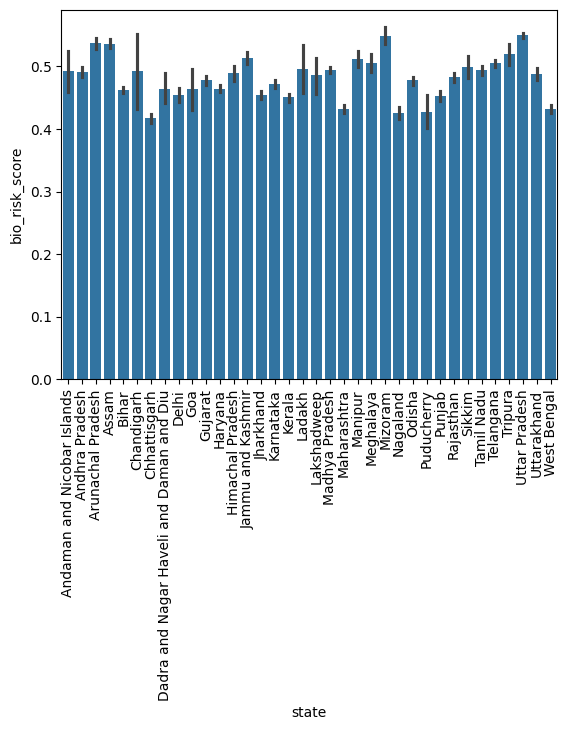

In [108]:
sns.barplot(x='state', y='bio_risk_score', data=monthly_df_bio)
plt.xticks(rotation=90)
plt.show()

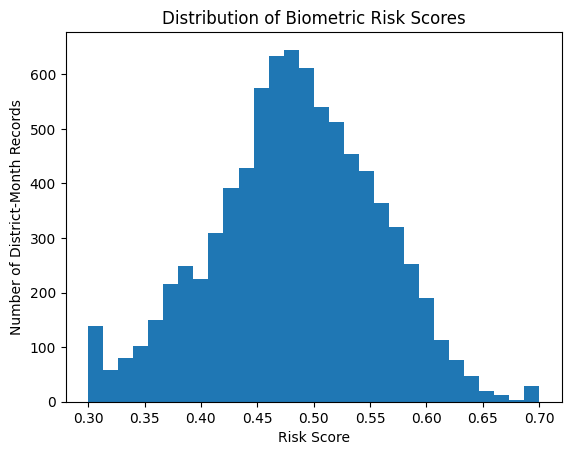

In [110]:
plt.figure()
plt.hist(monthly_df_bio['bio_risk_score'], bins=30)
plt.xlabel("Risk Score")
plt.ylabel("Number of District-Month Records")
plt.title("Distribution of Biometric Risk Scores")
plt.show()


In [112]:
num_cols_m=monthly_df_bio.select_dtypes(include=['number']).columns.tolist()
cat_cols_m=monthly_df_bio.select_dtypes(include=['category','object']).columns.tolist()

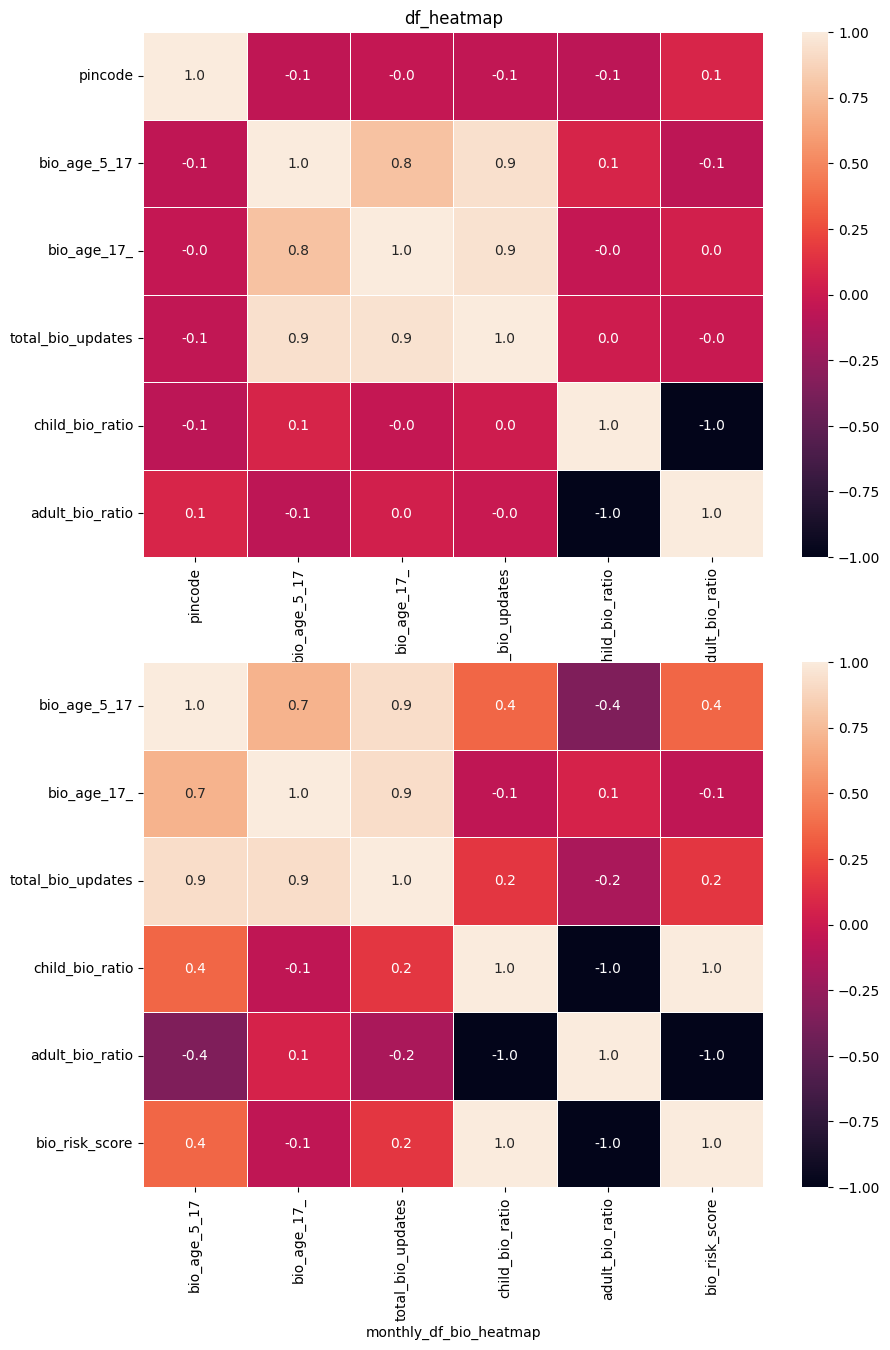

In [115]:
# comparing the heatmap of df and monthly_df

plt.figure(figsize=(10,15))
plt.subplot(2,1,1)
sns.heatmap(df[num_cols].corr(), annot=True, fmt='.1f', linewidth=0.6)
plt.title("df_heatmap")

plt.subplot(2,1,2)
sns.heatmap(monthly_df_bio[num_cols_m].corr(), annot=True, fmt='.1f', linewidth=0.6)
plt.xlabel("monthly_df_bio_heatmap")
plt.show()

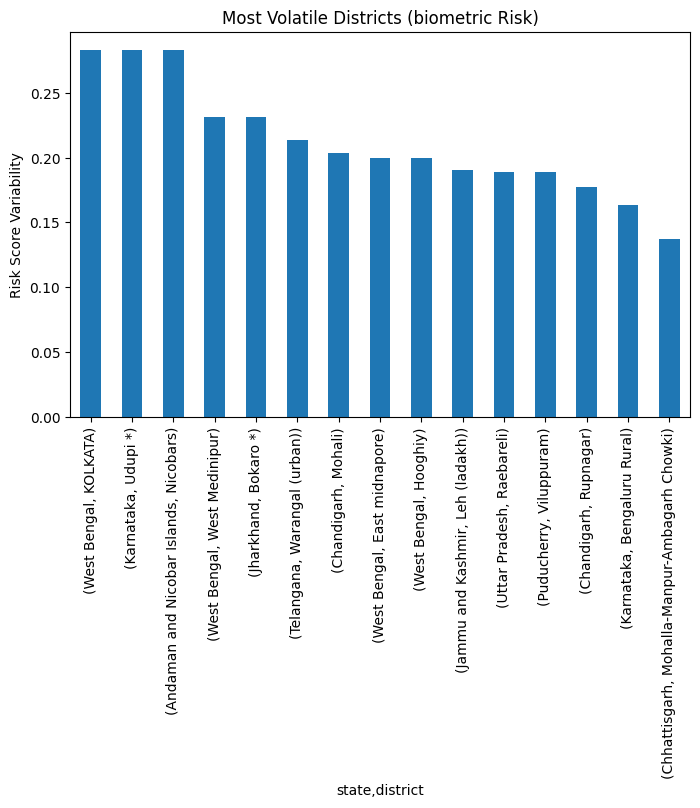

In [117]:
district_volatility = (
    monthly_df_bio.groupby(['state','district'])['bio_risk_score']
    .std()
    .sort_values(ascending=False)
    .head(15)
)

plt.figure(figsize=(8,5))
district_volatility.plot(kind='bar')
plt.ylabel("Risk Score Variability")
plt.title("Most Volatile Districts (biometric Risk)")
plt.show()


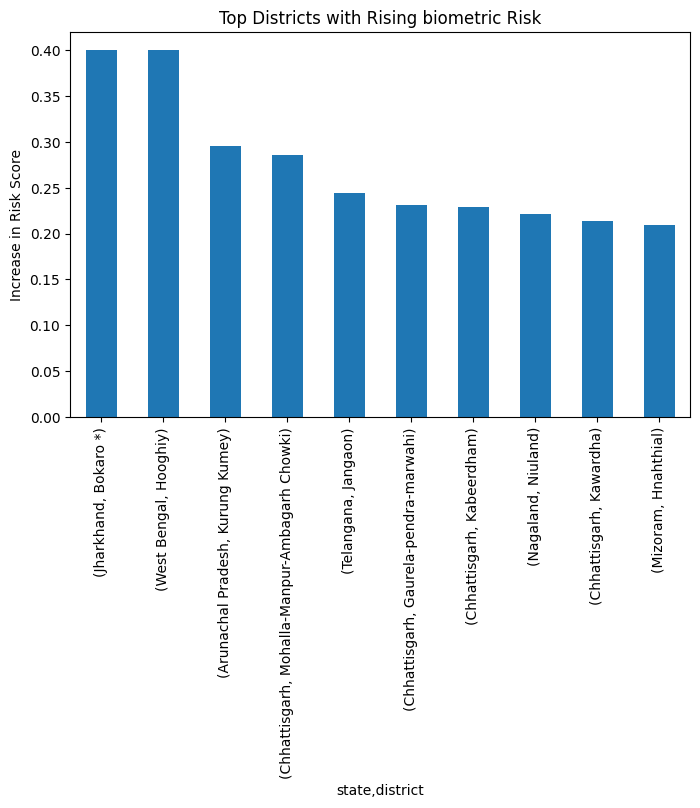

In [118]:
risk_trend = (
    monthly_df_bio.sort_values('month')
    .groupby(['state','district'])['bio_risk_score']
    .apply(lambda x: x.iloc[-1] - x.iloc[0])
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(8,5))
risk_trend.plot(kind='bar')
plt.ylabel("Increase in Risk Score")
plt.title("Top Districts with Rising biometric Risk")
plt.show()


In [119]:
monthly_df_bio.head()

state  district    month  bio_age_5_17  bio_age_17_  \
0  Andaman and Nicobar Islands  Andamans  2025-03            16          193   
1  Andaman and Nicobar Islands  Andamans  2025-04            17          167   
2  Andaman and Nicobar Islands  Andamans  2025-05            22          158   
3  Andaman and Nicobar Islands  Andamans  2025-06            11          129   
4  Andaman and Nicobar Islands  Andamans  2025-07            20          239   

   total_bio_updates  child_bio_ratio  adult_bio_ratio  bio_risk_score  \
0                209         0.076555         0.923445        0.330622   
1                184         0.092391         0.907609        0.336957   
2                180         0.122222         0.877778        0.348889   
3                140         0.078571         0.921429        0.331429   
4                259         0.077220         0.922780        0.330888   

  month_name  
0      March  
1      April  
2        May  
3       June  
4       July

In [120]:
# monthly_df.to_csv("monthly_enrolment.csv", index=False)
monthly_df_bio.to_csv("monthly_biometric.csv", index=False)
